In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

# Contexte

L'agence Santé publique France souhaite rendre les données de santé publique plus accessibles. 
L'objectif est de les rendre utilisables par ses agents. 

Ce notebook présente la réalisation d'une première exploration et visualisation des données. 
Sa vocation est d'être un support pour les agents de l'agence Santé publique France afin qu'ils puissent s'appuyer sur les résultats obtenus.

L'analyse est basée sur le jeu de données Open Food Facts.

# 1. Nettoyage de la base de données

## 1.1 Importation des librairies, fonctions et données

Les librairies nécessaires pour l'étude sont importées dans l'environnement de travail.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime  # Manipuler dates et heures

### 1.1.1. Importation du jeu de données

Le fichier est au format csv, la séparation est une tabulation '\t'. L'ajout de low_memory=False permet d'éviter les problèmes de mémoire lors du chargement.

In [6]:
df_brut = pd.read_csv('fr.openfoodfacts.org.products.csv', sep = '\t', low_memory=False)

In [7]:
df_brut.shape

(320772, 162)

In [8]:
df_brut=df_brut.sample(frac=1)

### 1.1.2. Description du jeu de données

In [9]:
df_quanti = df_brut.select_dtypes(exclude='object')
df_quali = df_brut.select_dtypes(include='object')
print(
    f"La base de données contient {df_quanti.shape[1]} variables quantitatives",
    f" et {df_quali.shape[1]} variables qualitatives")

La base de données contient 106 variables quantitatives  et 56 variables qualitatives


In [10]:
df_quanti

no_nutriments  additives_n  ingredients_from_palm_oil_n  \
193551            NaN          3.0                          0.0   
314696            NaN          NaN                          NaN   
256801            NaN          NaN                          NaN   
269048            NaN          0.0                          0.0   
189074            NaN          NaN                          NaN   
...               ...          ...                          ...   
280414            NaN          NaN                          NaN   
114180            NaN          6.0                          0.0   
108275            NaN          0.0                          0.0   
12272             NaN          5.0                          0.0   
145494            NaN          4.0                          0.0   

        ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
193551                        NaN                                      0.0   
314696                        NaN                                      NaN   
256801                        NaN                                      NaN   
269048                        NaN                                      0.0   
189074                        NaN                                      NaN   
...                           ...                                      ...   
280414                        NaN                                      NaN   
114180                        NaN                                      1.0   
108275                        NaN                                      0.0   
12272                         NaN                                      0.0   
145494                        NaN                                      0.0   

        ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
193551                                    NaN                 NaN   
314696                                    NaN                 NaN   
256801                                    NaN                 NaN   
269048                                    NaN                 NaN   
189074                                    NaN                 NaN   
...                                       ...                 ...   
280414                                    NaN                 NaN   
114180                                    NaN                 NaN   
108275                                    NaN                 NaN   
12272                                     NaN                 NaN   
145494                                    NaN                 NaN   

        energy_100g  energy-from-fat_100g  fat_100g  ...  ph_100g  \
193551        459.0                   NaN      2.30  ...      NaN   
314696        586.0                   NaN       NaN  ...      NaN   
256801          NaN                   NaN       NaN  ...      NaN   
269048       2268.0                   NaN     41.67  ...      NaN   
189074          NaN                   NaN       NaN  ...      NaN   
...             ...                   ...       ...  ...      ...   
280414          NaN                   NaN       NaN  ...      NaN   
114180       2092.0                   NaN     20.00  ...      NaN   
108275       1490.0                   NaN      2.22  ...      NaN   
12272           0.0                   NaN      0.00  ...      NaN   
145494        699.0                   NaN     10.42  ...      NaN   

        fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
193551                          NaN                               NaN   
314696                          NaN                               NaN   
256801                          NaN                               NaN   
269048                          NaN                               NaN   
189074                          NaN                               NaN   
...                             ...                               ...   
280414                          NaN                               NaN   
114180                  

In [11]:
df_quali

code                                                url  \
193551  3095757125011  http://world-fr.openfoodfacts.org/produit/3095...   
314696  8712566358984  http://world-fr.openfoodfacts.org/produit/8712...   
256801  4001431937305  http://world-fr.openfoodfacts.org/produit/4001...   
269048  4968737121008  http://world-fr.openfoodfacts.org/produit/4968...   
189074  3033490485566  http://world-fr.openfoodfacts.org/produit/3033...   
...               ...                                                ...   
280414  5449000113368  http://world-fr.openfoodfacts.org/produit/5449...   
114180  0259426018308  http://world-fr.openfoodfacts.org/produit/0259...   
108275  0094379303060  http://world-fr.openfoodfacts.org/produit/0094...   
12272   0015400159241  http://world-fr.openfoodfacts.org/produit/0015...   
145494  0783919127616  http://world-fr.openfoodfacts.org/produit/0783...   

                           creator   created_t      created_datetime  \
193551                    sebleouf  1448741303  2015-11-28T20:08:23Z   
314696                     kiliweb  1486117698  2017-02-03T10:28:18Z   
256801  openfoodfacts-contributors  1390753190  2014-01-26T16:19:50Z   
269048             usda-ndb-import  1489065999  2017-03-09T13:26:39Z   
189074             date-limite-app  1448272203  2015-11-23T09:50:03Z   
...                            ...         ...                   ...   
280414                   francisco  1487074183  2017-02-14T12:09:43Z   
114180             usda-ndb-import  1489075199  2017-03-09T15:59:59Z   
108275             usda-ndb-import  1489091101  2017-03-09T20:25:01Z   
12272              usda-ndb-import  1489143321  2017-03-10T10:55:21Z   
145494             usda-ndb-import  1489091433  2017-03-09T20:30:33Z   

       last_modified_t last_modified_datetime  \
193551      1465637914   2016-06-11T09:38:34Z   
314696      1486117699   2017-02-03T10:28:19Z   
256801      1390753193   2014-01-26T16:19:53Z   
269048      1489065999   2017-03-09T13:26:39Z   
189074      1462094206   2016-05-01T09:16:46Z   
...                ...                    ...   
280414      1487175251   2017-02-15T16:14:11Z   
114180      1489075199   2017-03-09T15:59:59Z   
108275      1489091101   2017-03-09T20:25:01Z   
12272       1489143321   2017-03-10T10:55:21Z   
145494      1489091433   2017-03-09T20:30:33Z   

                             product_name generic_name          quantity  ...  \
193551                Allumettes de Bacon          NaN  2 * 75 g (150 g)  ...   
314696                      Sorbet Citron          NaN               NaN  ...   
256801                                NaN          NaN               NaN  ...   
269048                       Roast Sesame          NaN               NaN  ...   
189074                        Petit frais          NaN               NaN  ...   
...                                   ...          ...               ...  ...   
280414  Chaudfontaine Source Thermal Bron          NaN              1 lt  ...   
114180                    Butter Biscuits          NaN               NaN  ...   
108275  Tajihha Galina, Roasted Buckwheat          NaN               NaN  ...   
12272                     Sparkling Water          NaN               NaN  ...   
145494                      Turkey Franks          NaN               NaN  ...   

       nutrition_grade_fr   pnns_groups_1 pnns_groups_2  \
193551                  d  Fish Meat Eggs          Meat   
314696                  c             NaN           NaN   
256801                NaN             NaN           NaN   
269048                  a             NaN           NaN   
189074                NaN             NaN           NaN   
...                   ...             ...           ...   
280414                NaN             NaN           NaN   
114180                  e             NaN           NaN   
108275                  a             NaN           NaN   
12272                 NaN             NaN           NaN   
145494                  d   

## wordcloud

In [12]:
from wordcloud import WordCloud
def word_cloud(wd_list):
    #stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df_brut)

ModuleNotFoundError: No module named 'wordcloud'

# Exploratory Data Analysis with pandas-profiling


In [13]:
#ici on utilise la librairie pandas_profiling pour avoir une idée du "comportement" des viariables du jeu de données

## 1.2 suppression des variables et des produits ayant trop de valeurs manquantes

### 1.2.1 Quantification des valeurs manquantes

In [14]:
print(
    f"La base de données brute contient {df_brut.shape[0]} produits (lignes) et "
    f"{df_brut.shape[1]} variables (colonnes)")

La base de données brute contient 320772 produits (lignes) et 162 variables (colonnes)


La proportion de valeurs manquantes dans la base de données est quantifiée pour l'ensemble de la base de données et suivant chaque variable.

### 1.2.2 Identification, quantification et suppression des variables ayant un taux de remplissage trop bas

In [15]:
df=df_brut.copy()

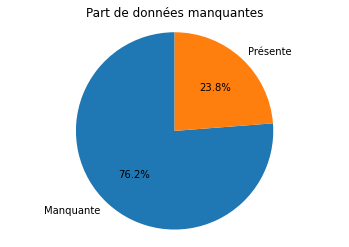

In [16]:
#La fonction graphique_remplissage montre une représentation de la quantité de cellules remplies par variable ainsi que la jauge qui va être appliquées pour la suppression des variables en fonction de leur remplissage
labels = 'Manquante', 'Présente'

fig, ax = plt.subplots()
sizes = df.isnull().sum().sum(), df.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Part de données manquantes')

plt.show()

<AxesSubplot:>

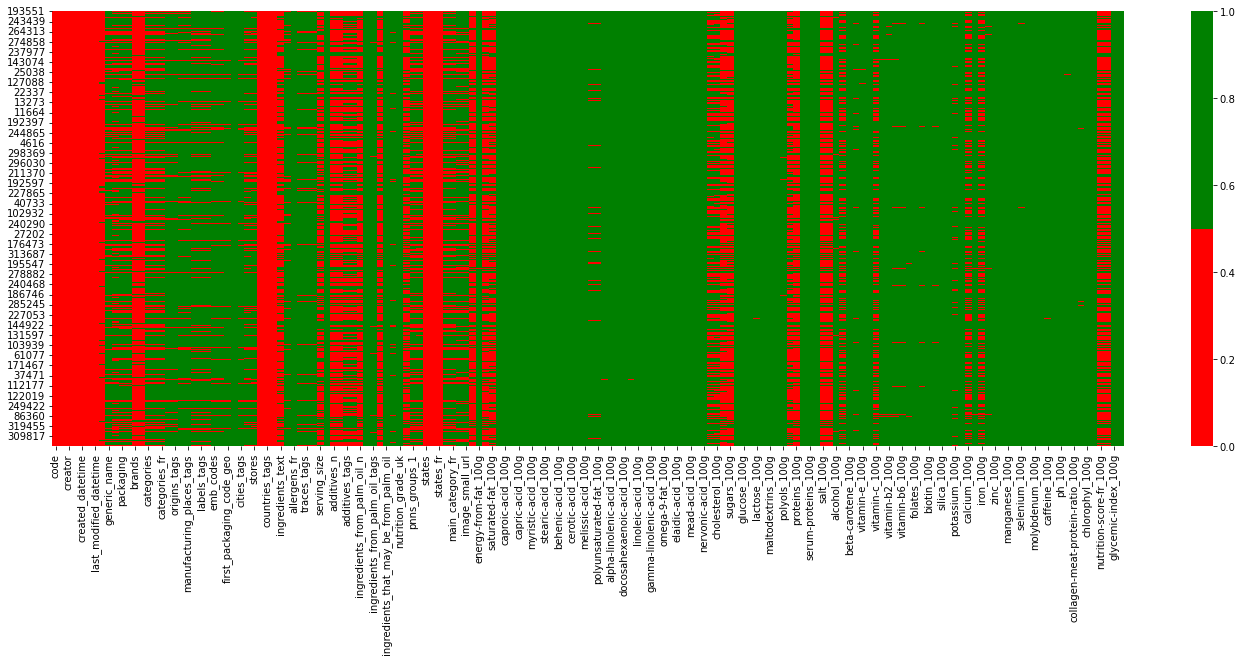

In [17]:
# il existe une autre manière rapide de se faire une idée du contenu de la base de données sous forme graphique
cols = df.columns.tolist() # on peut choisir ici le nombre de colonne
plt.figure(figsize = (24, 8))
colours = ['red', 'green'] # ici on choisit comme couleur bleu les données vides et en vert celles qui sont présentes
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

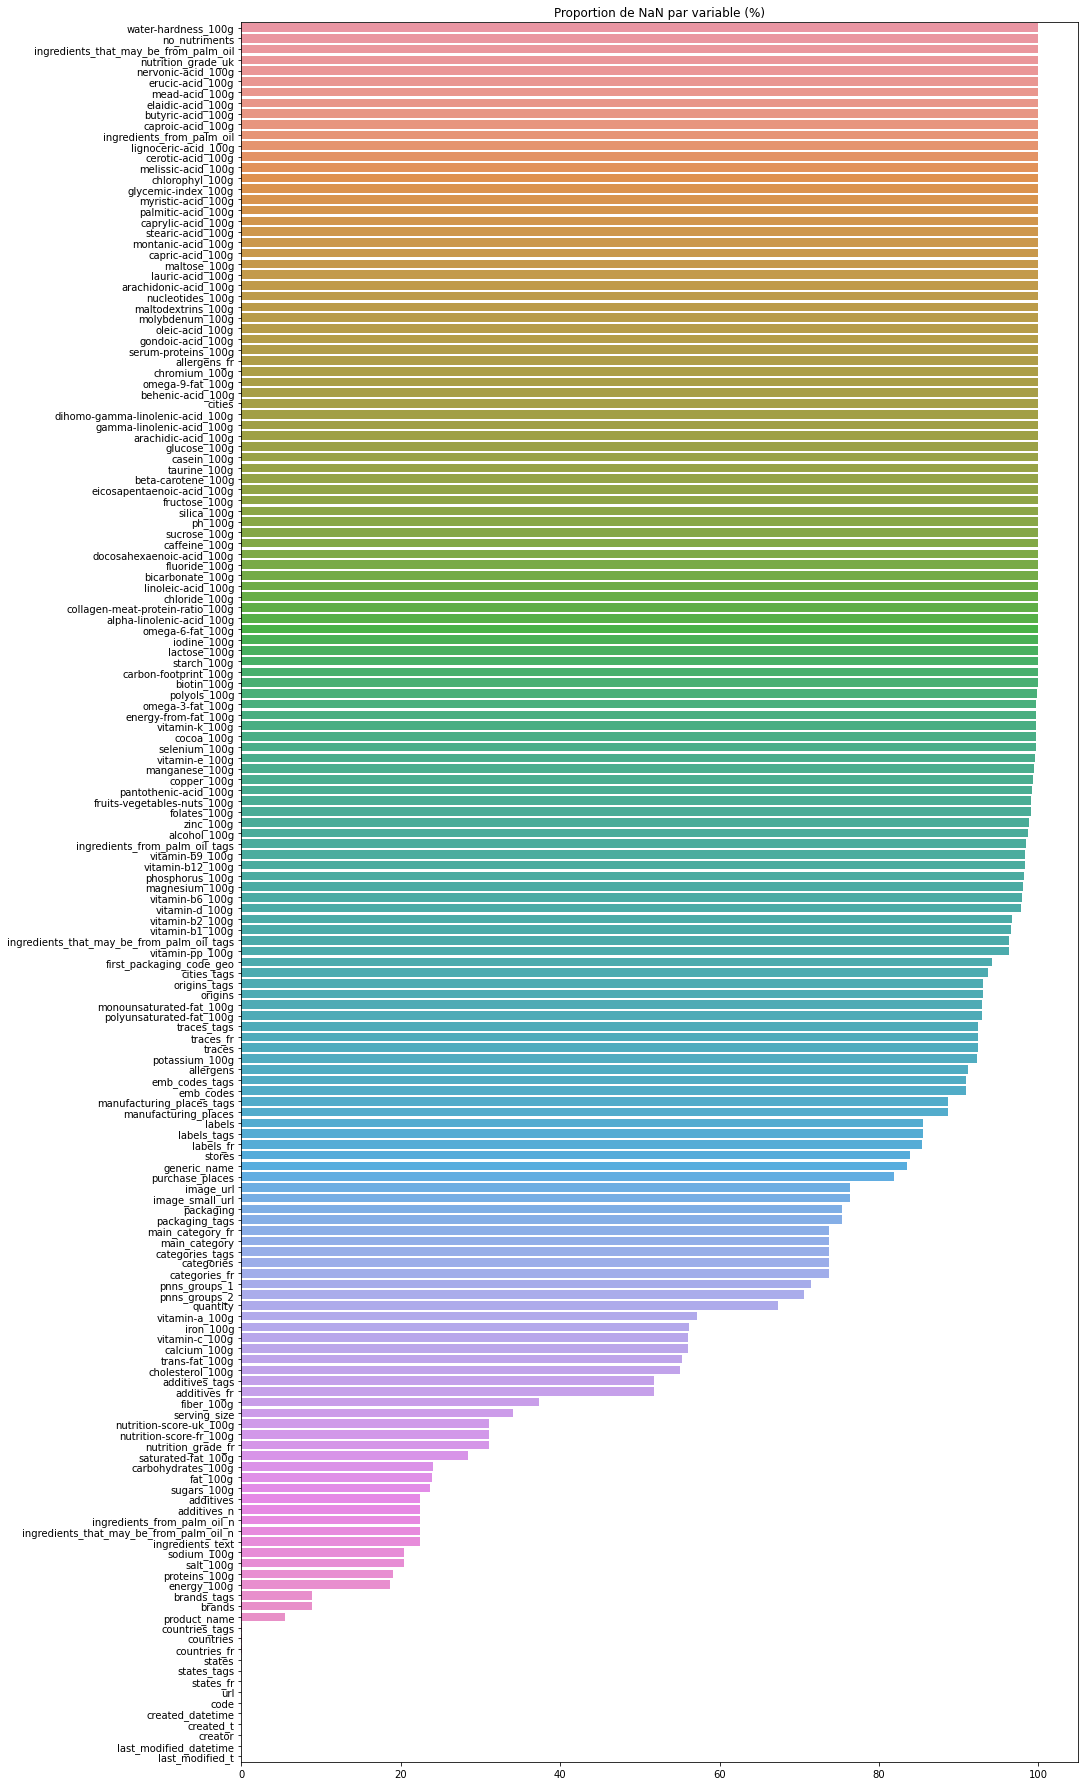

In [18]:
plt.figure(figsize=(15,32))
data_nan = df.isna().sum().sort_values(ascending=False)

plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=data_nan.values/df.shape[0]*100, y=data_nan.index)

In [19]:
df.shape

(320772, 162)

Les variables ayant un taux de remplissage inférieur à 10% (donc un taux de valeurs manquantes supérieur à 80%) sont supprimées de la base de données.

In [20]:
#La fonction suppr_col_highvalmanq supprime de la base de données les variables qui ont un taux de valeurs manquantes trop élévé et donne un tableau avec les variables qui n'ont pas été retenues pour la suite de l'étude.
#trop de données manquantes, rate=pourcentage maximale de données manquantes à supprimer
def drop_missing(data, rate):
    missing_rate = data.isna().sum()/data.shape[0]

    data = data[data.columns[(missing_rate < rate)]]
    return data


df=drop_missing(df,0.75) # on enleve toutes les colonnes qui ne sont pas remplies au moins de 25%, qui ont plus de 75% de données manquantes
# reste à optimier par d'autres critères comme pas intéressantes comme l'heure de remplissage et des datas redondantes

In [21]:
df.shape

(320772, 50)

<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

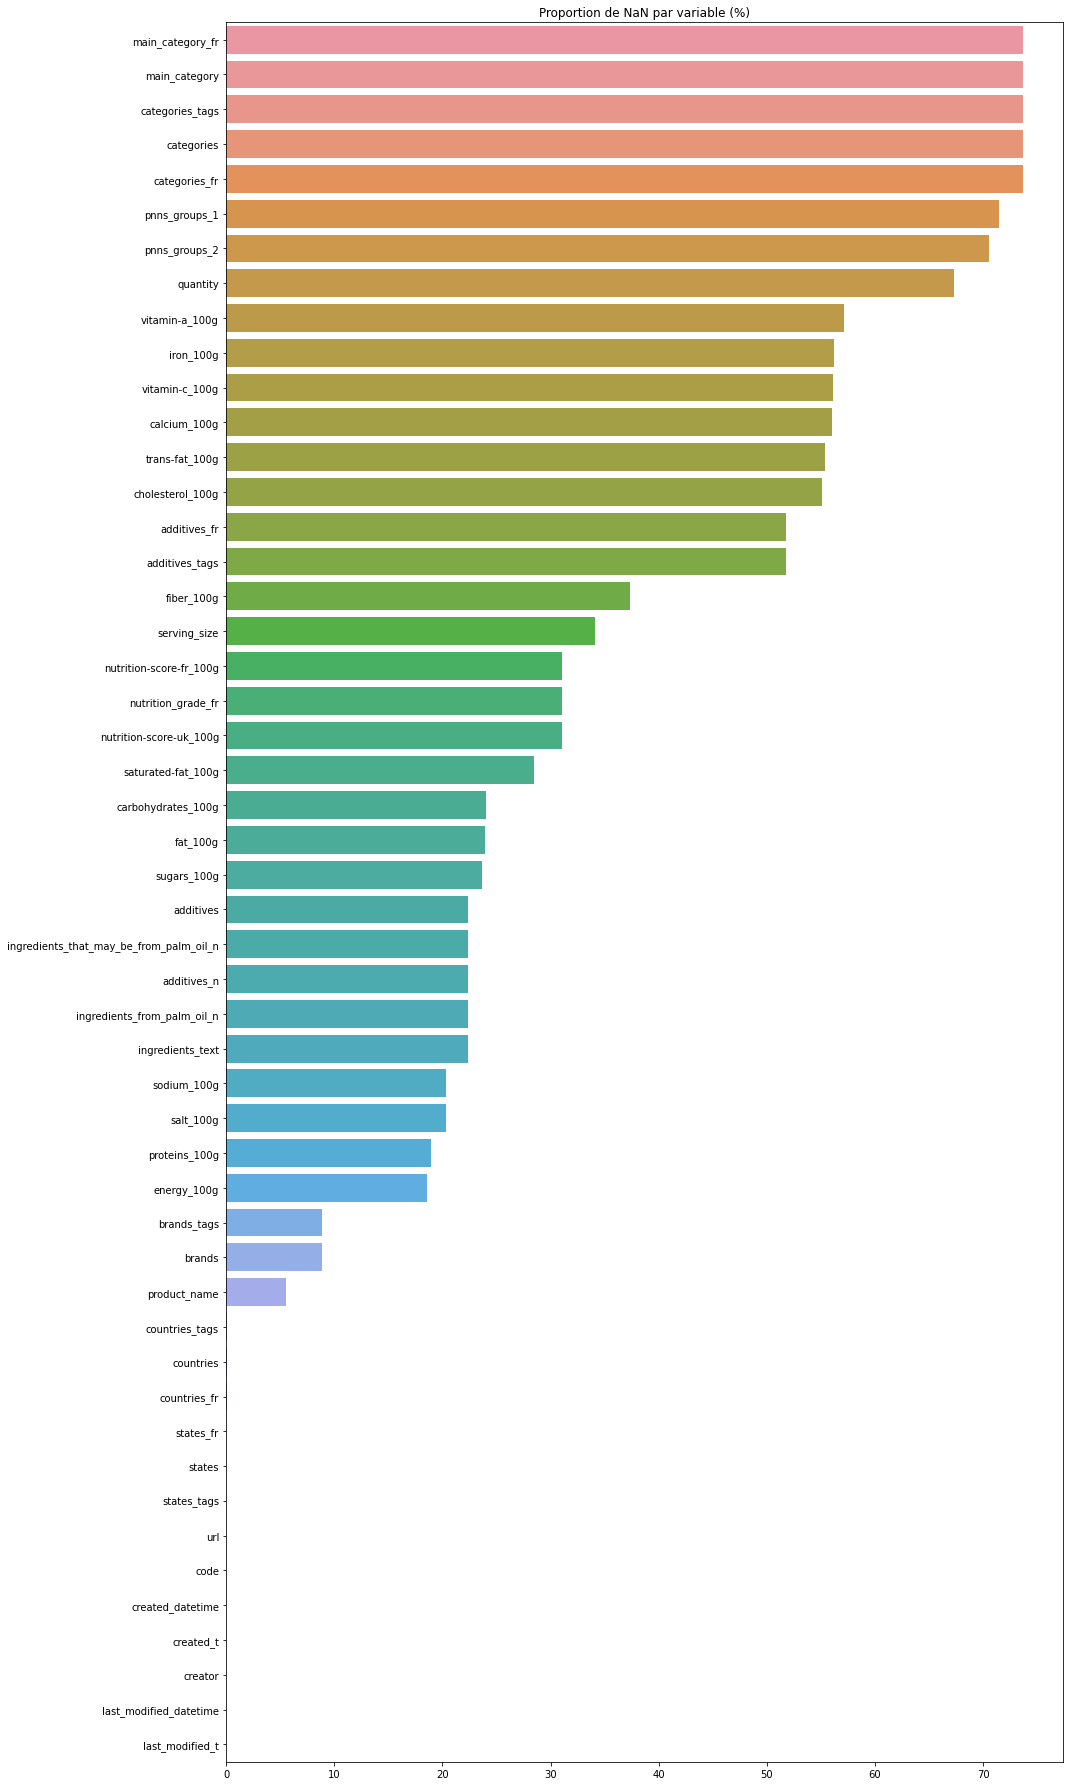

In [22]:
plt.figure(figsize=(15,32))
data_nan = df.isna().sum().sort_values(ascending=False)

plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=data_nan.values/df.shape[0]*100, y=data_nan.index)

### 1.2.3 Identification et suppression des variables redondantes ou non pertinentes 

**<span style="color:green"> Les variables qualitatives </span>** 

In [23]:
df_object = df.select_dtypes(include='object')
print(
    f"La base de données contient {df_object.shape[1]} variables qualitatives")

La base de données contient 30 variables qualitatives


Les variables qui contiennent des url ne sont pas pertinentes. Elles sont supprimées de la base de données.

In [24]:
colonnes_url = ["url"]
df_net = df.drop(columns=colonnes_url)

Il y a plusieurs variables qui donnent des informations sur la date de création ou de dernière modification. Dans cette étude, une seule variable de date de création de l'entrée dans la base de données est gardée.

In [25]:
df_net = df_net.drop(
    columns=['last_modified_datetime', 'created_datetime', 'last_modified_t'])

Il y a des variables très similaires dans leur nombre de valeurs manquantes/uniques. Ce sont des variables qui donnent la même information.
Seules les plus renseignées sont gardées.

In [26]:
df_object = df.select_dtypes(include='object')
print(
    f"La base de données contient {df_object.shape[1]} variables qualitatives")

La base de données contient 30 variables qualitatives


**<span style="color:green"> Les variables quantitatives </span>** 

In [27]:
df_quanti = df.select_dtypes(exclude='object')
print(
    f"La base de données contient {df_quanti.shape[1]} variables quantitatives"
)

La base de données contient 20 variables quantitatives


### 1.2.4 Quantification et suppression des lignes ayant trop de valeurs manquantes

Une partie des valeurs manquantes pour les variables quantitatives a été supprimée. Celles qui restent seront remplacées par des valeurs moyennes ou des médianes lors de l'étape d'imputation.

In [28]:
print(f"La base de données contient {df.shape[0]} produits et "
      f"{df.shape[1]} variables")

La base de données contient 320772 produits et 50 variables


## 1.3 Traitement des variables qualitatives

### 1.3.1. Remplacement des valeurs manquantes des variables qualitatives

Pour les variables qualitatitives, les NaN sont remplacés par des unknown. En effet, un manque d'information de ces variables est une information en soit.

In [29]:
#La fonction remp_unknown permet de remplacer les valeurs manquantes par 'unknown'
def encodage(data):
    for col in data.select_dtypes(include= ["object"]).columns:
        data[col] = data[col].replace(np.NaN, 'unknown') 
 
    return data

df=encodage(df)
df.isna().sum()


code                                            0
url                                             0
creator                                         0
created_t                                       0
created_datetime                                0
last_modified_t                                 0
last_modified_datetime                          0
product_name                                    0
quantity                                        0
brands                                          0
brands_tags                                     0
categories                                      0
categories_tags                                 0
categories_fr                                   0
countries                                       0
countries_tags                                  0
countries_fr                                    0
ingredients_text                                0
serving_size                                    0
additives_n                                 71833


### 1.3.2. Quantification et suppression des produits impossible à identifier

Certains produits sont impossible à identifier. Ils n'ont pas de "product name" par exemple". Ils sont supprimés de la base de données.

In [30]:
print(f"La base de données contient {df.shape[0]} produits et "
      f"{df.shape[1]} variables")

La base de données contient 320772 produits et 50 variables


In [31]:
df=df[df["product_name"]!='unknown']

In [32]:
print(f"La base de données contient {df.shape[0]} produits et "
      f"{df.shape[1]} variables")

La base de données contient 303010 produits et 50 variables


### 1.3.3. Quantification et suppression des lignes dupliquées

Dans cette étude, un doublon est une ligne qui a le même nom de produit, la même marque et la même énergie en kcal. Ces lignes sont quantifiées et supprimées de la base de données.

In [33]:
nb_dupli = df.duplicated(
    subset=['product_name', 'brands_tags', 'energy_100g']).sum()
df = df[(df.duplicated(
    subset=['product_name', 'brands_tags', 'energy_100g']) == False)]
print(
    'Il y a ', nb_dupli,
    ' lignes dupliquées dans la base de données. Elles sont supprimées de la base de données'
)

Il y a  13138  lignes dupliquées dans la base de données. Elles sont supprimées de la base de données


In [34]:
print(f"La base de données contient {df.shape[0]} produits et "
      f"{df.shape[1]} variables")

La base de données contient 289872 produits et 50 variables


In [35]:
df_object = df.select_dtypes(include='object')
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289872 entries, 193551 to 145494
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   code                    289872 non-null  object
 1   url                     289872 non-null  object
 2   creator                 289872 non-null  object
 3   created_t               289872 non-null  object
 4   created_datetime        289872 non-null  object
 5   last_modified_t         289872 non-null  object
 6   last_modified_datetime  289872 non-null  object
 7   product_name            289872 non-null  object
 8   quantity                289872 non-null  object
 9   brands                  289872 non-null  object
 10  brands_tags             289872 non-null  object
 11  categories              289872 non-null  object
 12  categories_tags         289872 non-null  object
 13  categories_fr           289872 non-null  object
 14  countries               289872 

### 1.3.4. Suppression des variables qualitatives non pertinentes

**<span style="color:orange"> La variable "states_tags" </span>** 

In [36]:
df['states_tags'].head(5)

193551    en:to-be-checked,en:complete,en:nutrition-fact...
314696    en:to-be-completed,en:nutrition-facts-complete...
269048    en:to-be-completed,en:nutrition-facts-complete...
189074    en:to-be-completed,en:nutrition-facts-to-be-co...
294304    en:to-be-completed,en:nutrition-facts-complete...
Name: states_tags, dtype: object

La variable "states_tags" n'apporte pas d'information intéressante. Elle est supprimée de la base de données.

In [37]:
df = df.drop(columns=['states_tags'])

**<span style="color:orange"> La variable "categories_tags" </span>** 

In [38]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_fr',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

### 1.3.5. Traitement des variables qualitatives pertinentes

In [39]:
df_object = df.select_dtypes(include='object')
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289872 entries, 193551 to 145494
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   code                    289872 non-null  object
 1   url                     289872 non-null  object
 2   creator                 289872 non-null  object
 3   created_t               289872 non-null  object
 4   created_datetime        289872 non-null  object
 5   last_modified_t         289872 non-null  object
 6   last_modified_datetime  289872 non-null  object
 7   product_name            289872 non-null  object
 8   quantity                289872 non-null  object
 9   brands                  289872 non-null  object
 10  brands_tags             289872 non-null  object
 11  categories              289872 non-null  object
 12  categories_tags         289872 non-null  object
 13  categories_fr           289872 non-null  object
 14  countries               289872 

**<span style="color:orange"> La variable "product_name" </span>** 

In [40]:
df['product_name'].value_counts()

Ice Cream                                                  334
Extra Virgin Olive Oil                                     203
Potato Chips                                               175
Premium Ice Cream                                          158
Cookies                                                    146
                                                          ... 
Mezcla Sandwich Spread With Jamonilla                        1
Coquillettes - Pâtes alimentaires de qualité supérieure      1
Pinot noir 2014                                              1
Bonbon Gélifié Dragibus Bi Cool 2                            1
Tajihha Galina, Roasted Buckwheat                            1
Name: product_name, Length: 221347, dtype: int64

La variable "product_name" sert à l'identification du produit.
Néanmoins, il faudra se rappeler que pour l'analyse multivariée elle peut créer des problèmes à cause de son grand nombre de valeurs différentes.

**<span style="color:orange"> La variable "quantity" </span>** 

In [41]:
df['quantity'].value_counts()

unknown                      188561
500 g                          4504
200 g                          3954
250 g                          3774
100 g                          2960
                              ...  
48 Servings                       1
500 g (8 à 10 chipolatas)         1
200 г, 8 шт                       1
338 g                             1
20 lozenges                       1
Name: quantity, Length: 13505, dtype: int64

La variable "quantity" n'est pas pertinente au niveau des valeurs mais ces unités peuvent indiquer si le produit est solide, liquide (ou "autre").

In [42]:
df = df.drop(columns=['quantity'])

In [43]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'countries', 'countries_tags', 'countries_fr', 'ingredients_text',
       'serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_fr',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

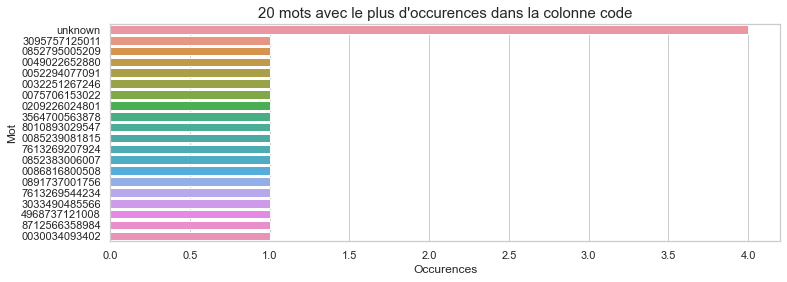

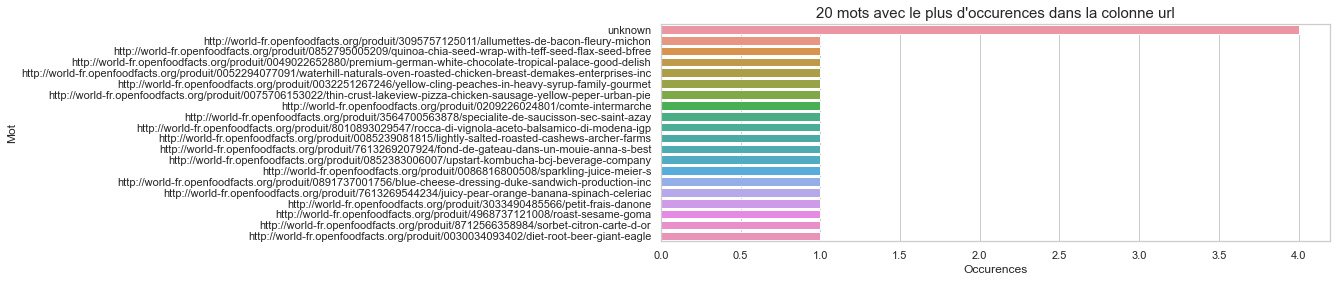

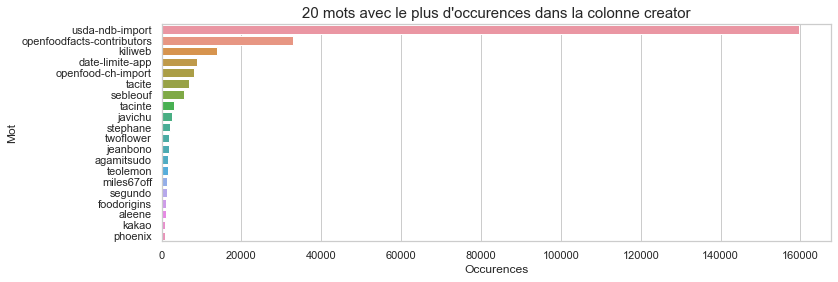

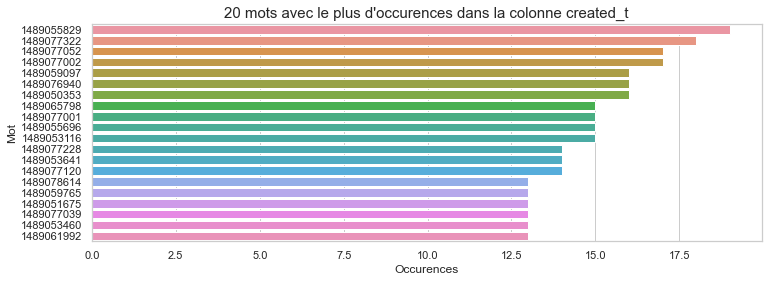

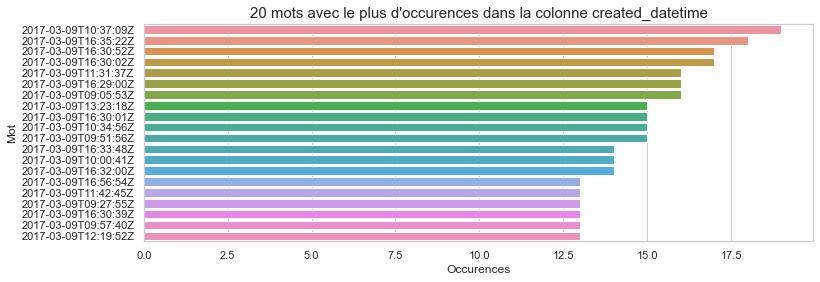

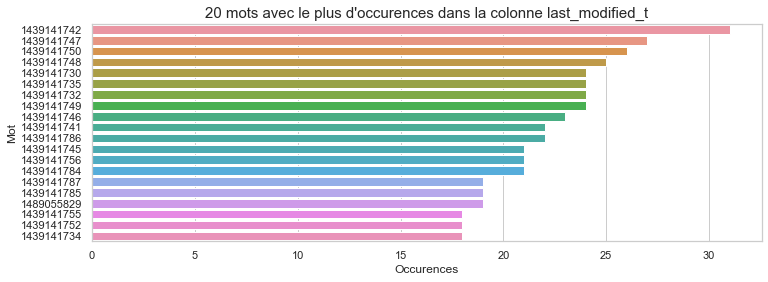

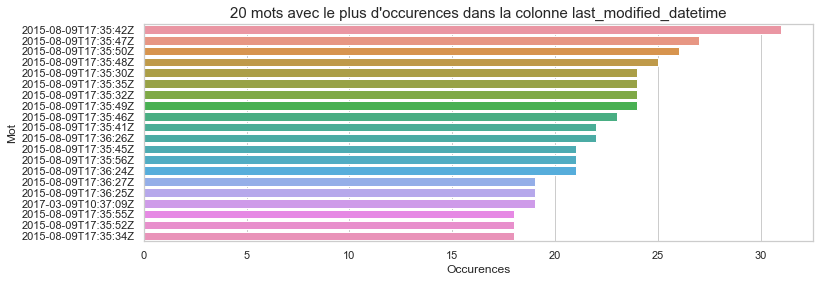

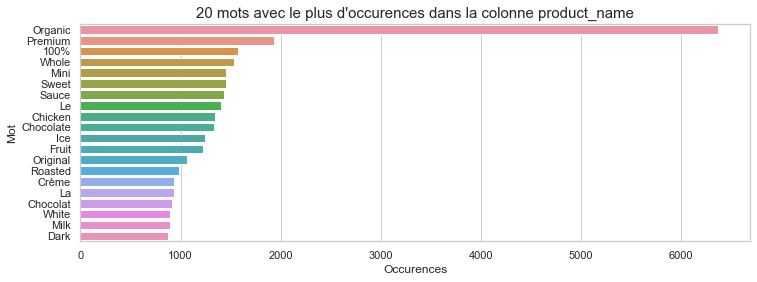

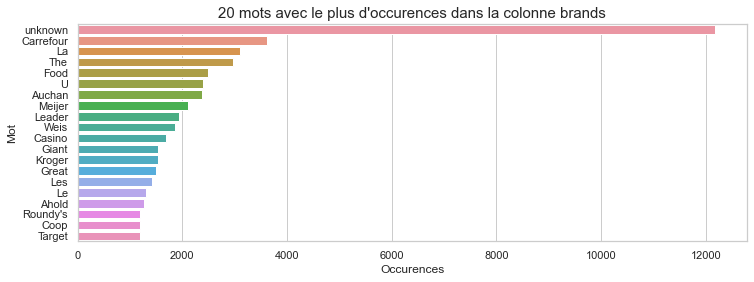

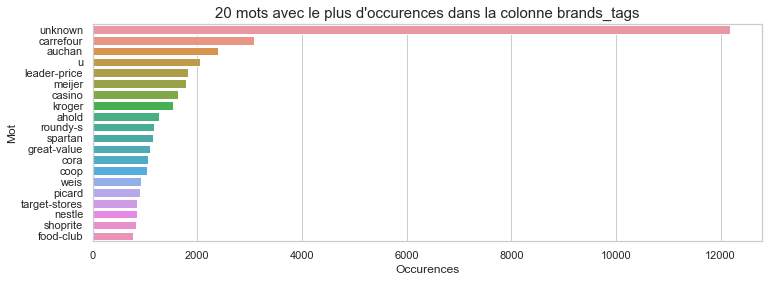

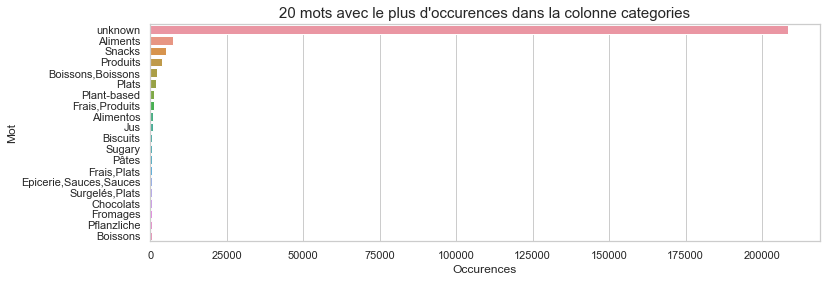

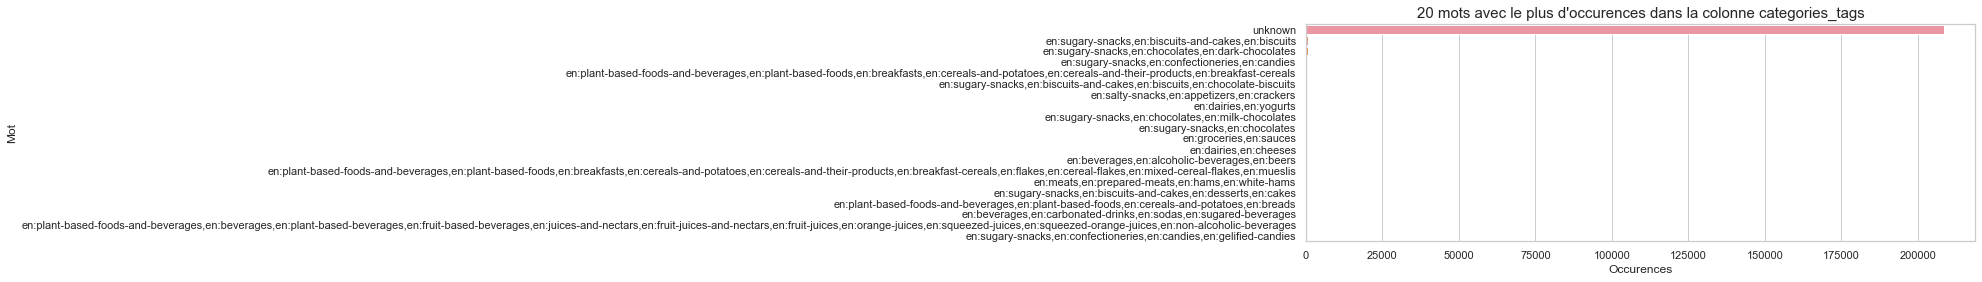

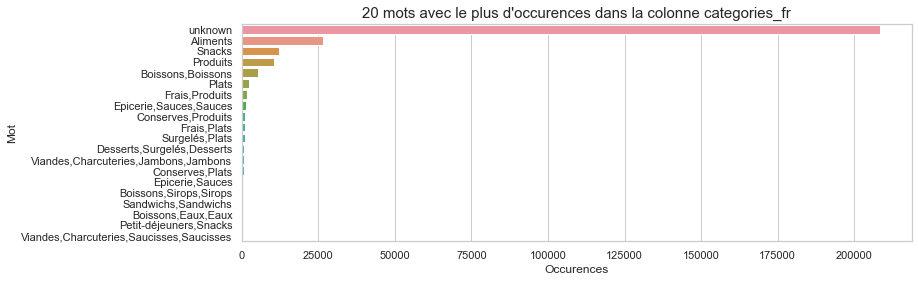

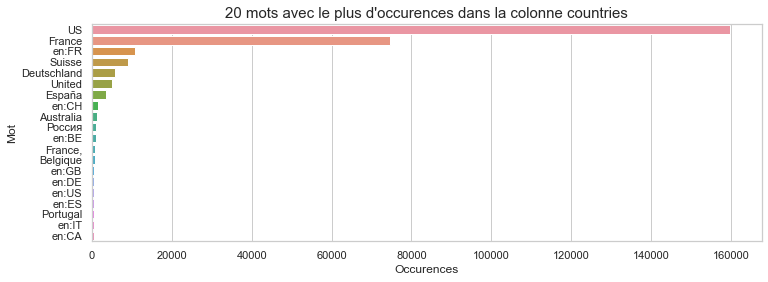

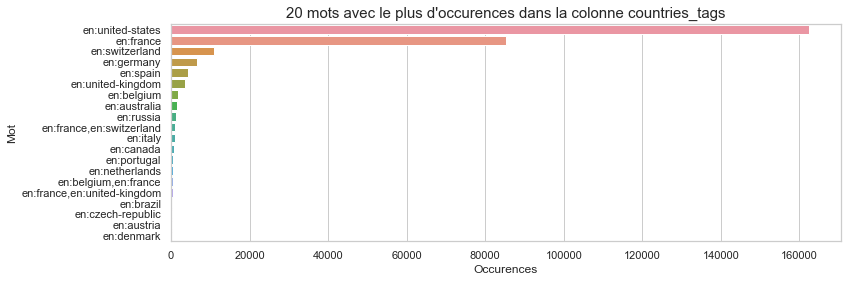

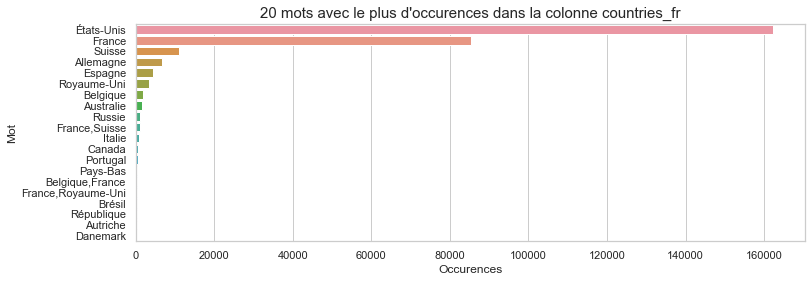

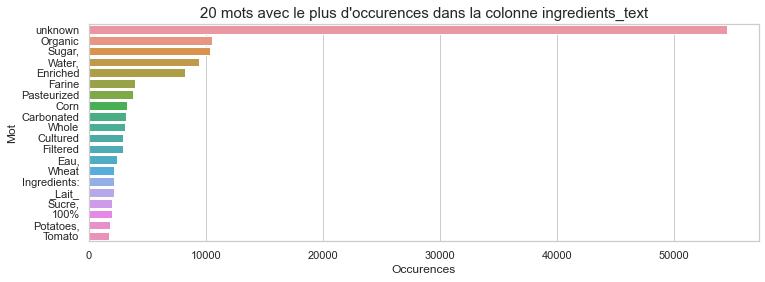

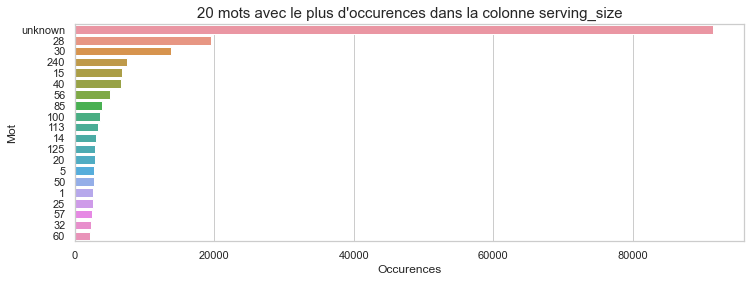

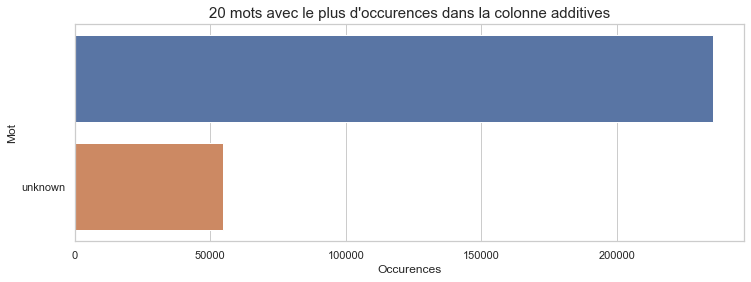

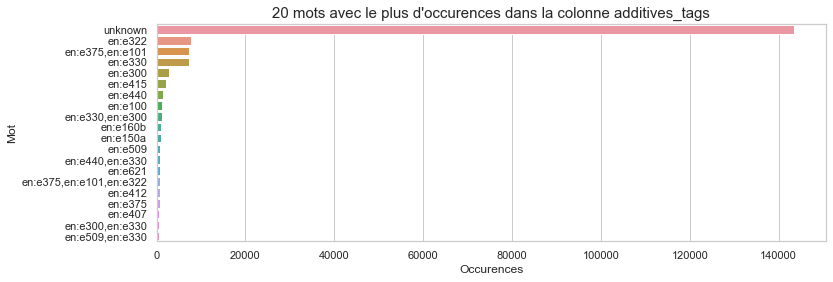

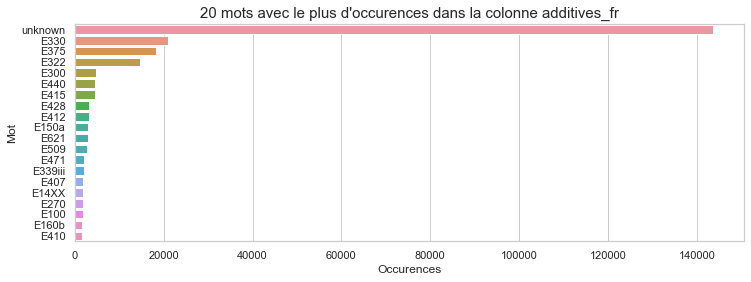

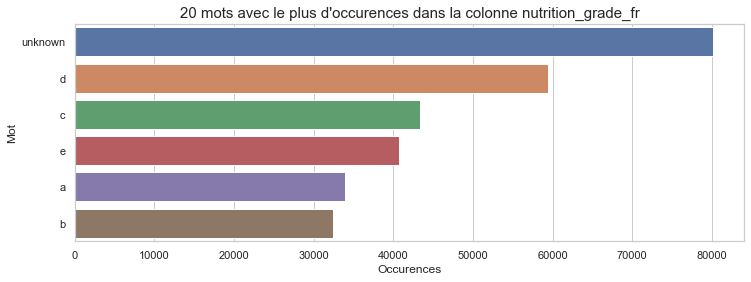

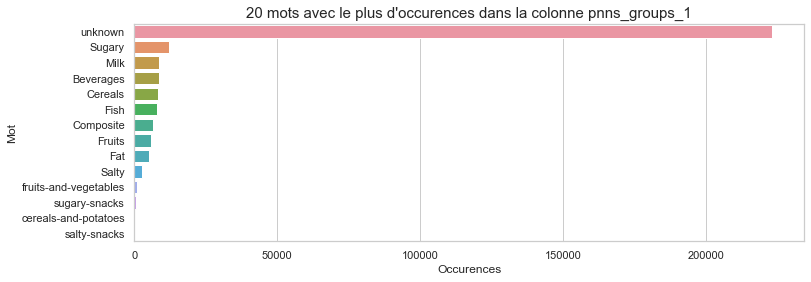

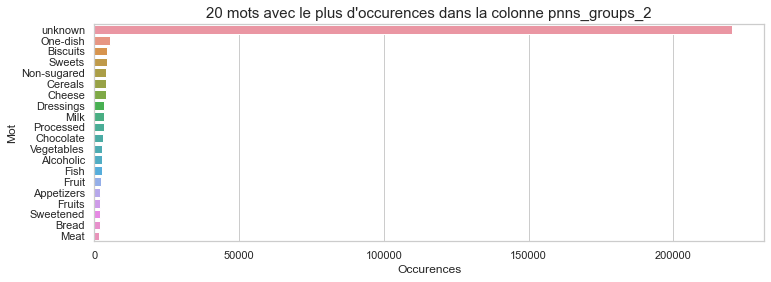

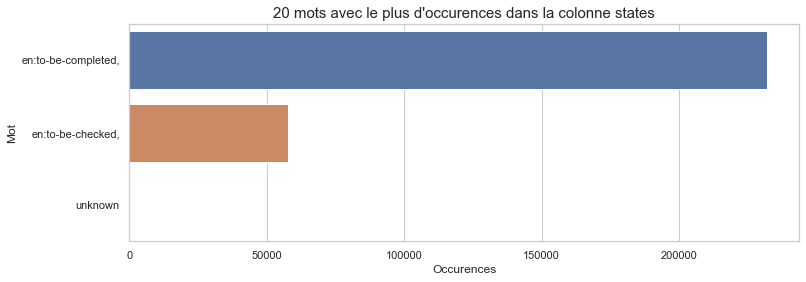

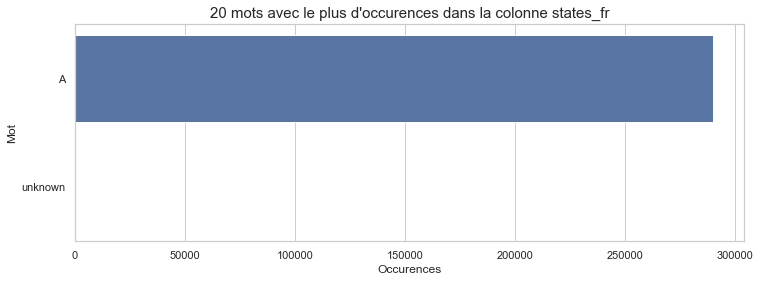

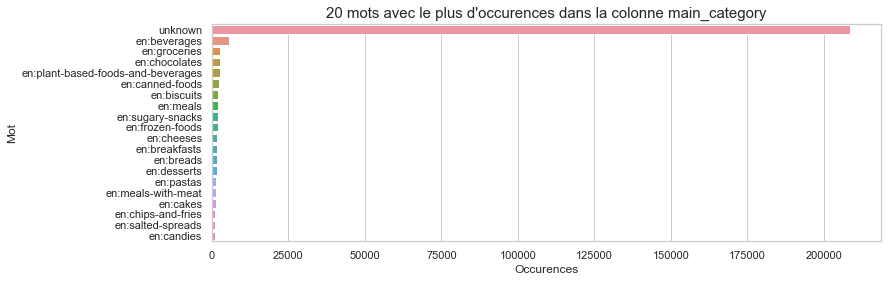

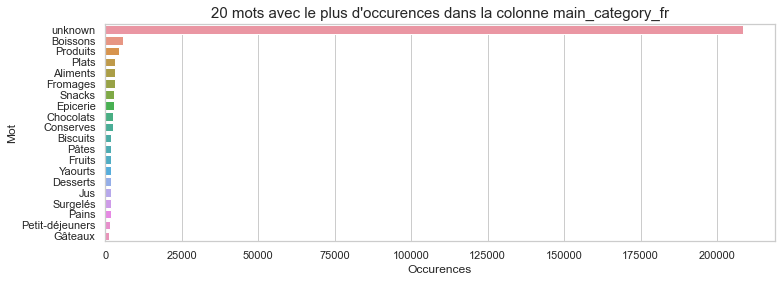

In [44]:
# Analyse des données catégorielles par analyse de l'occurence des mots
# après avoir lancer la commande pip install wordcloud
def Occurences_mots(data):
    object_columns = data.select_dtypes(include = ['object']).columns
    import collections
    mots_populaires = []
    for colonne in object_columns :
        liste_mots = [str(i).split(' ', 1)[0] for i in data[colonne].dropna().tolist()]
        mots_populaires.append(collections.Counter(liste_mots).most_common(20))

    sns.set(font_scale=2.5)
    for nom_colonne, liste_mots in zip(object_columns[0:], mots_populaires[0:]):
        sns.set(style="whitegrid")
        plt.figure(figsize=(12, 4))

        df_mots_utilises = pd.DataFrame(liste_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
        df_mots_utilises.head()
        sns.barplot(y = 'Mot', x='Occurences', data = df_mots_utilises)
        plt.title('20 mots avec le plus d\'occurences dans la colonne ' + nom_colonne, size=15)
        plt.show()

    sns.set(font_scale=1)
Occurences_mots(df)

In [45]:
#autres variables a supprimer ici

Les emballages sont ensuite regroupés par matière dans une nouvelle variable "packaging_matiere".

In [46]:
df_sauvegarde = df.copy(deep=True)

In [47]:
df_net = df_sauvegarde.copy(deep=True)

**<span style="color:orange"> La variable "brands_tags" </span>** 

In [48]:
df_net['brands_tags'].value_counts(ascending=False)

unknown               12189
carrefour              3085
auchan                 2386
u                      2049
leader-price           1823
                      ...  
wolnosc                   1
laberyrie                 1
bakehuset                 1
michael-season-s          1
korfez,schwalbchen        1
Name: brands_tags, Length: 49934, dtype: int64

**<span style="color:orange"> La variable "countries_tags" </span>** 

In [49]:
df_net['countries_tags']

193551           en:france
314696           en:france
269048    en:united-states
189074           en:france
294304      en:switzerland
                ...       
280414          en:belgium
114180    en:united-states
108275    en:united-states
12272     en:united-states
145494    en:united-states
Name: countries_tags, Length: 289872, dtype: object

In [50]:
df_net['countries'] = df_net['countries_tags'].str.split(',').str[0]
df_net['countries'] = df_net['countries'].str[3:]
df_net['countries'].value_counts()

united-states    162348
france            88169
switzerland       11127
germany            6940
spain              4439
                  ...  
vanuatu               1
island                1
nce                   1
oman                  1
maldives              1
Name: countries, Length: 172, dtype: int64

La variable "countries_tags" est transformée en une variable "countries" qui contient les 25 pays les plus représentés et qui regroupe les autres pays dans une valeur 'Autre'.

La variable "countries_tags" est supprimée de la base de données. Elle a été transformée en la variable "countries".

In [51]:
df_net = df_net.drop(columns='countries_tags')

**<span style="color:orange"> La variable ingredients_text </span>** 

In [52]:
df_net['ingredients_text'].value_counts()

unknown                                                                                                                                                                                              54498
Almonds.                                                                                                                                                                                               202
Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron), thiamin mononitrate, riboflavin, folic acid.                                                                                    176
Carbonated water, natural flavor.                                                                                                                                                                      172
Extra virgin olive oil.                                                                                                                                                                     

La variable "ingredients_text" ne donne pas d'information exploitable 

In [53]:
df_net = df_net.drop(columns=['ingredients_text'])

**<span style="color:orange"> La variable serving_size </span>** 

In [54]:
df_net['serving_size'].value_counts()

unknown                   91458
240 ml (8 fl oz)           5081
28 g (1 oz)                4955
28 g (1 ONZ)               3561
30 g (2 Tbsp)              2734
                          ...  
28 g (5 BEANS | ABOUT)        1
53 g (2 DONUTS)               1
236.5 ml (8 ONZ)              1
0.5 l                         1
30 g (4 BISCUITS)             1
Name: serving_size, Length: 25057, dtype: int64

In [55]:
df_net = df_net.drop(columns=['serving_size'])

**<span style="color:orange"> La variable additives_tags </span>** 

In [56]:
df_net['additives_tags'] = df_net['additives_tags'].str[3:]
df_net['additives_tags'].value_counts()

nown                                                                143531
e322                                                                  7822
e375,en:e101                                                          7347
e330                                                                  7273
e300                                                                  2847
                                                                     ...  
e407,en:e410,en:e160a,en:e100                                            1
e1400,en:e508                                                            1
e375,en:e101,en:e150a,en:e160b,en:e300,en:e500ii,en:e541,en:e322         1
e332,en:e263,en:e451,en:e508,en:e316,en:e250                             1
e500ii,en:e420,en:e150a,en:e150,en:e160a,en:e160                         1
Name: additives_tags, Length: 40571, dtype: int64

In [57]:
df_net = df_net.drop(columns=['additives_tags'])

**<span style="color:orange"> La variable pnns_groups_1 </span>** 

In [58]:
df_net['pnns_groups_1'].value_counts()

unknown                    223070
Sugary snacks               11987
Milk and dairy products      8637
Beverages                    8542
Cereals and potatoes         8245
Fish Meat Eggs               7807
Composite foods              6670
Fruits and vegetables        5742
Fat and sauces               4960
Salty snacks                 2732
fruits-and-vegetables         973
sugary-snacks                 490
cereals-and-potatoes           16
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

**<span style="color:orange"> La variable pnns_groups_2 </span>** 

Il y a des doublons du fait que certaines modalités ont une majuscule. Il suffit de mettre une majuscule au début de chaque modalité.

In [59]:
df_net['pnns_groups_2'].value_counts()

unknown                             220352
One-dish meals                        5487
Biscuits and cakes                    4487
Sweets                                4485
Non-sugared beverages                 4048
Cereals                               4012
Cheese                                3932
Dressings and sauces                  3434
Milk and yogurt                       3215
Processed meat                        3144
Chocolate products                    3015
Vegetables                            2760
Alcoholic beverages                   2650
Fish and seafood                      2574
Appetizers                            2045
Fruits                                2006
Sweetened beverages                   1994
Fruit juices                          1881
Bread                                 1801
Meat                                  1646
Fats                                  1526
Breakfast cereals                     1370
vegetables                             920
Legumes    

Une petite base de données donnant le nombre de produits par modalité est créée.

Cette variable est conservée. Néanmoins il sera impossible de remplacer les unknown à partir des autres variables de la base de données.

In [60]:
del df_net['created_t']

In [61]:
df_net.head()

code                                                url  \
193551  3095757125011  http://world-fr.openfoodfacts.org/produit/3095...   
314696  8712566358984  http://world-fr.openfoodfacts.org/produit/8712...   
269048  4968737121008  http://world-fr.openfoodfacts.org/produit/4968...   
189074  3033490485566  http://world-fr.openfoodfacts.org/produit/3033...   
294304  7613269544234  http://world-fr.openfoodfacts.org/produit/7613...   

                   creator      created_datetime last_modified_t  \
193551            sebleouf  2015-11-28T20:08:23Z      1465637914   
314696             kiliweb  2017-02-03T10:28:18Z      1486117699   
269048     usda-ndb-import  2017-03-09T13:26:39Z      1489065999   
189074     date-limite-app  2015-11-23T09:50:03Z      1462094206   
294304  openfood-ch-import  2017-02-07T22:38:49Z      1490556746   

       last_modified_datetime                                    product_name  \
193551   2016-06-11T09:38:34Z                             Allumettes de Bacon   
314696   2017-02-03T10:28:19Z                                   Sorbet Citron   
269048   2017-03-09T13:26:39Z                                    Roast Sesame   
189074   2016-05-01T09:16:46Z                                     Petit frais   
294304   2017-03-26T19:32:26Z  Juicy: pear, orange, banana, spinach, celeriac   

               brands    brands_tags           categories  ... fiber_100g  \
193551  Fleury Michon  fleury-michon  Allumettes de bacon  ...        NaN   
314696     Carte D'or     carte-d-or              unknown  ...        0.0   
269048           Goma           goma              unknown  ...       16.7   
189074         Danone         danone              unknown  ...        NaN   
294304        unknown        unknown      Jus multifruits  ...        2.5   

       proteins_100g salt_100g sodium_100g  vitamin-a_100g vitamin-c_100g  \
193551         22.00     2.700    1.062992             NaN            NaN   
314696          0.30     0.039    0.015354             NaN            NaN   
269048         16.67     0.000    0.000000             0.0            0.0   
189074           NaN       NaN         NaN             NaN            NaN   
294304          1.00     0.030    0.011811             NaN            NaN   

       calcium_100g  iron_100g  nutrition-score-fr_100g  \
193551          NaN        NaN                     11.0   
314696          NaN        NaN                      6.0   
269048          0.0        0.0                     -3.0   
189074          NaN        NaN                      NaN   
294304          NaN        NaN                      3.0   

       nutrition-score-uk_100g  
193551                    11.0  
314696                     6.0  
269048                    -3.0  
189074                     NaN  
294304                    -7.0  

[5 rows x 43 columns]

In [62]:
df_net = df_net.drop(
    columns=['last_modified_datetime', 'created_datetime', 'last_modified_t'])

In [63]:
df_net = df_net.drop(
    columns=['code', 'url','creator'])

In [64]:
df_net = df_net.drop(
    columns=['nutrition-score-uk_100g'])

In [65]:
df_net.head(2)

product_name         brands    brands_tags  \
193551  Allumettes de Bacon  Fleury Michon  fleury-michon   
314696        Sorbet Citron     Carte D'or     carte-d-or   

                 categories  \
193551  Allumettes de bacon   
314696              unknown   

                                          categories_tags  \
193551  en:meats,en:pork,en:bacon,en:smoked-bacon-lardons   
314696                                            unknown   

                                 categories_fr countries countries_fr  \
193551  Viandes,Porc,Bacon,Allumettes de bacon    france       France   
314696                                 unknown    france       France   

        additives_n                                          additives  ...  \
193551          3.0   [ noix-de-jambon-de-porc -> fr:noix-de-jambon...  ...   
314696          NaN                                            unknown  ...   

       sugars_100g  fiber_100g  proteins_100g salt_100g sodium_100g  \
193551         0.5         NaN           22.0     2.700    1.062992   
314696        27.0         0.0            0.3     0.039    0.015354   

       vitamin-a_100g vitamin-c_100g calcium_100g iron_100g  \
193551            NaN            NaN          NaN       NaN   
314696            NaN            NaN          NaN       NaN   

       nutrition-score-fr_100g  
193551                    11.0  
314696                     6.0  

[2 rows x 36 columns]

**<span style="color:orange"> La variable main_category </span>** 

In [66]:
df_net['main_category'] = df_net['main_category'].str[3:]

In [67]:
df_net['main_category'].value_counts()

nown                               208396
beverages                            5670
groceries                            2789
chocolates                           2704
plant-based-foods-and-beverages      2694
                                    ...  
sauce-au-raifort                        1
boissons-chocolats                      1
poulet-prepare-a-cuire                  1
preparation-a-base-de-soja              1
cough-lozenges                          1
Name: main_category, Length: 3268, dtype: int64

In [68]:
df_object = df_net.select_dtypes(include='object')
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289872 entries, 193551 to 145494
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   product_name        289872 non-null  object
 1   brands              289872 non-null  object
 2   brands_tags         289872 non-null  object
 3   categories          289872 non-null  object
 4   categories_tags     289872 non-null  object
 5   categories_fr       289872 non-null  object
 6   countries           289872 non-null  object
 7   countries_fr        289872 non-null  object
 8   additives           289872 non-null  object
 9   additives_fr        289872 non-null  object
 10  nutrition_grade_fr  289872 non-null  object
 11  pnns_groups_1       289872 non-null  object
 12  pnns_groups_2       289872 non-null  object
 13  states              289872 non-null  object
 14  states_fr           289872 non-null  object
 15  main_category       289872 non-null  object
 1

## 1.4. Traitement des variables quantitatives

### 1.4.1. Traitement des valeurs impossibles et abérrantes

In [69]:
df_net_float = df_net.select_dtypes(exclude='object')
df_net_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289872 entries, 193551 to 145494
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   additives_n                              235370 non-null  float64
 1   ingredients_from_palm_oil_n              235370 non-null  float64
 2   ingredients_that_may_be_from_palm_oil_n  235370 non-null  float64
 3   energy_100g                              246220 non-null  float64
 4   fat_100g                                 229158 non-null  float64
 5   saturated-fat_100g                       217310 non-null  float64
 6   trans-fat_100g                           135221 non-null  float64
 7   cholesterol_100g                         136116 non-null  float64
 8   carbohydrates_100g                       228841 non-null  float64
 9   sugars_100g                              231481 non-null  float64
 10  fiber_100g                 

In [70]:
df_sauvegarde = df_net.copy(deep=True)

In [71]:
df_net = df_sauvegarde.copy(deep=True)

In [72]:
df_net.shape

(289872, 36)

In [73]:
df_net.head()

product_name         brands  \
193551                             Allumettes de Bacon  Fleury Michon   
314696                                   Sorbet Citron     Carte D'or   
269048                                    Roast Sesame           Goma   
189074                                     Petit frais         Danone   
294304  Juicy: pear, orange, banana, spinach, celeriac        unknown   

          brands_tags           categories  \
193551  fleury-michon  Allumettes de bacon   
314696     carte-d-or              unknown   
269048           goma              unknown   
189074         danone              unknown   
294304        unknown      Jus multifruits   

                                          categories_tags  \
193551  en:meats,en:pork,en:bacon,en:smoked-bacon-lardons   
314696                                            unknown   
269048                                            unknown   
189074                                            unknown   
294304  en:plant-based-foods-and-beverages,en:beverage...   

                                            categories_fr      countries  \
193551             Viandes,Porc,Bacon,Allumettes de bacon         france   
314696                                            unknown         france   
269048                                            unknown  united-states   
189074                                            unknown         france   
294304  Aliments et boissons à base de végétaux,Boisso...    switzerland   

       countries_fr  additives_n  \
193551       France          3.0   
314696       France          NaN   
269048   États-Unis          0.0   
189074       France          NaN   
294304       Suisse          NaN   

                                                additives  ... sugars_100g  \
193551   [ noix-de-jambon-de-porc -> fr:noix-de-jambon...  ...        0.50   
314696                                            unknown  ...       27.00   
269048   [ black-sesame-seed -> en:black-sesame-seed  ...  ...        8.33   
189074                                            unknown  ...         NaN   
294304                                            unknown  ...        9.00   

        fiber_100g  proteins_100g salt_100g sodium_100g vitamin-a_100g  \
193551         NaN          22.00     2.700    1.062992            NaN   
314696         0.0           0.30     0.039    0.015354            NaN   
269048        16.7          16.67     0.000    0.000000            0.0   
189074         NaN            NaN       NaN         NaN            NaN   
294304         2.5           1.00     0.030    0.011811            NaN   

       vitamin-c_100g calcium_100g iron_100g nutrition-score-fr_100g  
193551            NaN          NaN       NaN                    11.0  
314696            NaN          NaN       NaN                     6.0  
269048            0.0          0.0       0.0                    -3.0  
189074            NaN          NaN       NaN                     NaN  
294304            NaN          NaN       NaN                     3.0  

[5 rows x 36 columns]

### 1.4.2. Imputation des valeurs manquantes des variables quantitatives

In [74]:
#Les valeurs de la variable "sodium_100g"etc doivent être inférieures à 100 ET toujours POSITIVES

columns = [
    'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
    'iron_100g','fat_100g', 'saturated-fat_100g', 'trans-fat_100g','salt_100g']


for column in columns:
    df_net.replace(df_net[column]<0,0,inplace=True)
    df_net.replace(df_net[column]>100,100,inplace=True)
    
#df_test
df_net

product_name  \
193551                             Allumettes de Bacon   
314696                                   Sorbet Citron   
269048                                    Roast Sesame   
189074                                     Petit frais   
294304  Juicy: pear, orange, banana, spinach, celeriac   
...                                                ...   
280414               Chaudfontaine Source Thermal Bron   
114180                                 Butter Biscuits   
108275               Tajihha Galina, Roasted Buckwheat   
12272                                  Sparkling Water   
145494                                   Turkey Franks   

                              brands                brands_tags  \
193551                 Fleury Michon              fleury-michon   
314696                    Carte D'or                 carte-d-or   
269048                          Goma                       goma   
189074                        Danone                     danone   
294304                       unknown                    unknown   
...                              ...                        ...   
280414                 Chaudfontaine              chaudfontaine   
114180                   Ker Cadelac                ker-cadelac   
108275  Kradjian Importing Co.  Inc.  kradjian-importing-co-inc   
12272     Western Family Foods  Inc.   western-family-foods-inc   
145494                       Aaron's                    aaron-s   

                 categories  \
193551  Allumettes de bacon   
314696              unknown   
269048              unknown   
189074              unknown   
294304      Jus multifruits   
...                     ...   
280414              unknown   
114180              unknown   
108275              unknown   
12272               unknown   
145494              unknown   

                                          categories_tags  \
193551  en:meats,en:pork,en:bacon,en:smoked-bacon-lardons   
314696                                            unknown   
269048                                            unknown   
189074                                            unknown   
294304  en:plant-based-foods-and-beverages,en:beverage...   
...                                                   ...   
280414                                            unknown   
114180                                            unknown   
108275                                            unknown   
12272                                             unknown   
145494                                            unknown   

                                            categories_fr      countries  \
193551             Viandes,Porc,Bacon,Allumettes de bacon         france   
314696                                            unknown         france   
269048                                            unknown  united-states   
189074                                            unknown         france   
294304  Aliments et boissons à base de végétaux,Boisso...    switzerland   
...                                                   ...            ...   
280414                                            unknown        belgium   
114180                                            unknown  united-states   
108275                                            unknown  united-states   
12272                                             unknown  united-states   
145494                                            unknown  united-states   

       countries_fr  additives_n  \
193551       France          3.0   
314696       France          NaN   
269048   États-Unis          0.0   
189074       France          NaN   
294304       Suisse          NaN   
...             ...          ...   
280414     Belgique          NaN   
114180   États-Unis          6.0   
108275   États-Unis          0.0   
12272    États-Unis          5.0   
145494   États-Unis          4.0   

                                                additives  ... sugars_100g  \
193551   [

In [75]:
df.min()

code                                                                           0000000003087
url                                        http://world-fr.openfoodfacts.org/produit/0000...
creator                                                                             00225892
created_t                                                                                  0
created_datetime                                                        2012-01-31T14:43:58Z
last_modified_t                                                                   1332368132
last_modified_datetime                                                  2012-03-21T22:15:32Z
product_name                                                                                
brands                                                                              365 дней
brands_tags                                                                  0-72935-01160-4
categories                                                            

Afin de décider si les valeurs manquantes doivent être remplacées par des médianes ou des moyennes, il faut détecter les variables qui ont un taux de valeurs abérrantes supérieur à 5% et celles qui ont un taux de valeurs abérrantes inférieur à 5%.

In [76]:
# FONCTION DE DETERMINATION DES VALEURS ABBERANTES CELLES EN DEHORS DE L'INTERQUARTILE +/-50%
def outliers_rate(data):
    df_num=data.select_dtypes(exclude=['object',"category"])   #object=variables qualitatives
    Q1 = df_num.quantile(0.25)  
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1 
    is_outliers = (df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))

    outliers_missing=pd.DataFrame({ 'outliers_rate':is_outliers.sum(axis=0)/len(df_num)*100})   
    return outliers_missing
outliers_rate(df_brut)

outliers_rate
no_nutriments                                 0.000000
additives_n                                   3.055441
ingredients_from_palm_oil_n                   1.507301
ingredients_from_palm_oil                     0.000000
ingredients_that_may_be_from_palm_oil_n       3.646204
...                                                ...
carbon-footprint_100g                         0.011223
nutrition-score-fr_100g                       0.001247
nutrition-score-uk_100g                       0.000935
glycemic-index_100g                           0.000000
water-hardness_100g                           0.000000

[106 rows x 1 columns]

In [77]:
out=outliers_rate(df_brut)
out

outliers_rate
no_nutriments                                 0.000000
additives_n                                   3.055441
ingredients_from_palm_oil_n                   1.507301
ingredients_from_palm_oil                     0.000000
ingredients_that_may_be_from_palm_oil_n       3.646204
...                                                ...
carbon-footprint_100g                         0.011223
nutrition-score-fr_100g                       0.001247
nutrition-score-uk_100g                       0.000935
glycemic-index_100g                           0.000000
water-hardness_100g                           0.000000

[106 rows x 1 columns]

In [78]:
out[out.outliers_rate>5]

outliers_rate
saturated-fat_100g       5.376716
cholesterol_100g         6.528313
salt_100g                5.139788
sodium_100g              5.139476
vitamin-a_100g           5.286309
vitamin-c_100g           7.021498

In [79]:
col_plus=list(out[out.outliers_rate>5].index)

In [80]:
df_brut[col_plus].fillna(df_brut[col_plus], inplace=True)

C:\Users\tarik\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [81]:
col_moins=list(out[out.outliers_rate<=5].index)
df_brut[col_moins].fillna(df_brut[col_moins], inplace=True)

In [82]:
df_net.isna().sum()

product_name                                    0
brands                                          0
brands_tags                                     0
categories                                      0
categories_tags                                 0
categories_fr                                   0
countries                                       0
countries_fr                                    0
additives_n                                 54502
additives                                       0
additives_fr                                    0
ingredients_from_palm_oil_n                 54502
ingredients_that_may_be_from_palm_oil_n     54502
nutrition_grade_fr                              0
pnns_groups_1                                   0
pnns_groups_2                                   0
states                                          0
states_fr                                       0
main_category                                   0
main_category_fr                                0


In [83]:


# FONCTION DE REMPLACEMENT VALEURS ABERRANTES numériques PAR LA MOYENNE OU LA MEDIANE et des valeurs catégorielle vide par "unknow.0=^ml;:=60 kjn "
def fill_all_missing_values(data):
    #df=data.copy()
    for col in data.select_dtypes(include= ["int64","float64"]).columns:
        print('_________________________________Quanti___________________________________________________\n{}'.format(col))

        if outliers_rate(data)["outliers_rate"][col]<5:
            print("impute par moyenne car missing rate de ", outliers_rate(data)["outliers_rate"][col])
            val = data[col].mean()
            data[col].fillna(val, inplace=True)
        else:
            print("impute par mediane car missing rate de ", outliers_rate(data)["outliers_rate"][col])
            val = data[col].median()
            data[col].fillna(val, inplace=True)
    print("")
   
    
    for col in data.select_dtypes(include= "object").columns:
        print('_________________________________Quali___________________________________________________\n{}'.format(col))

        data[col].fillna("unknow", inplace=True)
    return data

# APPEL DE LA FONCTION DE REMPLACEMENT
df_net=fill_all_missing_values(df_net)


_________________________________Quanti___________________________________________________
additives_n
impute par moyenne car missing rate de  3.230046365292267
_________________________________Quanti___________________________________________________
ingredients_from_palm_oil_n
impute par moyenne car missing rate de  1.5651735938621185
_________________________________Quanti___________________________________________________
ingredients_that_may_be_from_palm_oil_n
impute par moyenne car missing rate de  3.8427305845338635
_________________________________Quanti___________________________________________________
energy_100g
impute par moyenne car missing rate de  0.3511894905337528
_________________________________Quanti___________________________________________________
fat_100g
impute par moyenne car missing rate de  2.6221918639951425
_________________________________Quanti___________________________________________________
saturated-fat_100g
impute par mediane car missing rate de  

In [84]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [85]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])


array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [86]:
def imputation_numerical_SimpleImputer(data,col):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
    X = data[col]
    data[col]=imputer.fit_transform(X)
    return  data

In [87]:
def imputation_numerical_KNNImputer(data,col):
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
    X = data[col]
    data[col]=imputer.fit_transform(X)
    return  data

In [88]:
#df=imputation_numerical_SimpleImputer(df,["nutrition-score-fr_100g","carbon-footprint_100g"])
#df=imputation_numerical_KNNImputer(df,["nutrition-score-uk_100g","nutrition-score-fr_100g"])


In [89]:
print(f"La base de données contient {df_net.shape[0]} lignes et "
      f"{df_net.shape[1]} variables")

La base de données contient 289872 lignes et 36 variables


## 1.5. Récapitulatif des bases de données

In [90]:
df_quanti = df_net.select_dtypes(exclude='object')
df_quali = df_net.select_dtypes(include='object')
print(
    f"La base de données contient {df_quanti.shape[1]} variables quantitatives",
    f" et {df_quali.shape[1]} variables qualitatives")

La base de données contient 19 variables quantitatives  et 17 variables qualitatives


In [91]:
df_net.to_csv('export_df_net.csv',
              sep='\t',
              index=False,
              header=True)

In [92]:
sauvegarde_df_net = pd.read_csv(
    "export_df_net.csv",
    sep='\t',
    low_memory=False)
sauvegarde_df_net.head()

product_name         brands  \
0                             Allumettes de Bacon  Fleury Michon   
1                                   Sorbet Citron     Carte D'or   
2                                    Roast Sesame           Goma   
3                                     Petit frais         Danone   
4  Juicy: pear, orange, banana, spinach, celeriac        unknown   

     brands_tags           categories  \
0  fleury-michon  Allumettes de bacon   
1     carte-d-or              unknown   
2           goma              unknown   
3         danone              unknown   
4        unknown      Jus multifruits   

                                     categories_tags  \
0  en:meats,en:pork,en:bacon,en:smoked-bacon-lardons   
1                                            unknown   
2                                            unknown   
3                                            unknown   
4  en:plant-based-foods-and-beverages,en:beverage...   

                                       categories_fr      countries  \
0             Viandes,Porc,Bacon,Allumettes de bacon         france   
1                                            unknown         france   
2                                            unknown  united-states   
3                                            unknown         france   
4  Aliments et boissons à base de végétaux,Boisso...    switzerland   

  countries_fr  additives_n  \
0       France     3.000000   
1       France     1.938866   
2   États-Unis     0.000000   
3       France     1.938866   
4       Suisse     1.938866   

                                           additives  ... sugars_100g  \
0   [ noix-de-jambon-de-porc -> fr:noix-de-jambon...  ...    0.500000   
1                                            unknown  ...   27.000000   
2   [ black-sesame-seed -> en:black-sesame-seed  ...  ...    8.330000   
3                                            unknown  ...   15.900968   
4                                            unknown  ...    9.000000   

   fiber_100g  proteins_100g salt_100g sodium_100g vitamin-a_100g  \
0    2.872184      22.000000     2.700    1.062992            0.0   
1    0.000000       0.300000     0.039    0.015354            0.0   
2   16.700000      16.670000     0.000    0.000000            0.0   
3    2.872184       7.107037     0.590    0.232283            0.0   
4    2.500000       1.000000     0.030    0.011811            0.0   

  vitamin-c_100g calcium_100g iron_100g nutrition-score-fr_100g  
0            0.0     0.125892  0.003372               11.000000  
1            0.0     0.125892  0.003372                6.000000  
2            0.0     0.000000  0.000000               -3.000000  
3            0.0     0.125892  0.003372                9.143817  
4            0.0     0.125892  0.003372                3.000000  

[5 rows x 36 columns]

In [93]:
df_net = sauvegarde_df_net.copy(deep=True)

# 2. Analyse Univariée

## 2.1. Les variables qualitatives

In [94]:
pd.get_dummies(df_net["nutrition_grade_fr"])


a  b  c  d  e  unknown
0       0  0  0  1  0        0
1       0  0  1  0  0        0
2       1  0  0  0  0        0
3       0  0  0  0  0        1
4       0  0  1  0  0        0
...    .. .. .. .. ..      ...
289867  0  0  0  0  0        1
289868  0  0  0  0  1        0
289869  1  0  0  0  0        0
289870  0  0  0  0  0        1
289871  0  0  0  1  0        0

[289872 rows x 6 columns]

Pour cette partie, les variables qualitatives seront représentées sans les valeurs "unknown". Les proportions affichées correspondent à la proportion parmi les produits dont la valeur de la variable a été renseignée dans la base de données.

In [95]:
df_net.shape

(289872, 36)

### 2.1.1. Les groupes de produits (Groupement n°1)

In [96]:
def histogramme(df, col):
    data=df.copy()
    data=data[data[col]!='unknown'] 
    df_count = data[col].value_counts()
    sns.barplot(df_count.index, df_count.values)
    return None


In [97]:
def bar(df, col):
    data=df.copy()
    data=data[data[col]!='unknown'] 
    df_count = data[col]
    df_count.hist()
    return None


C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


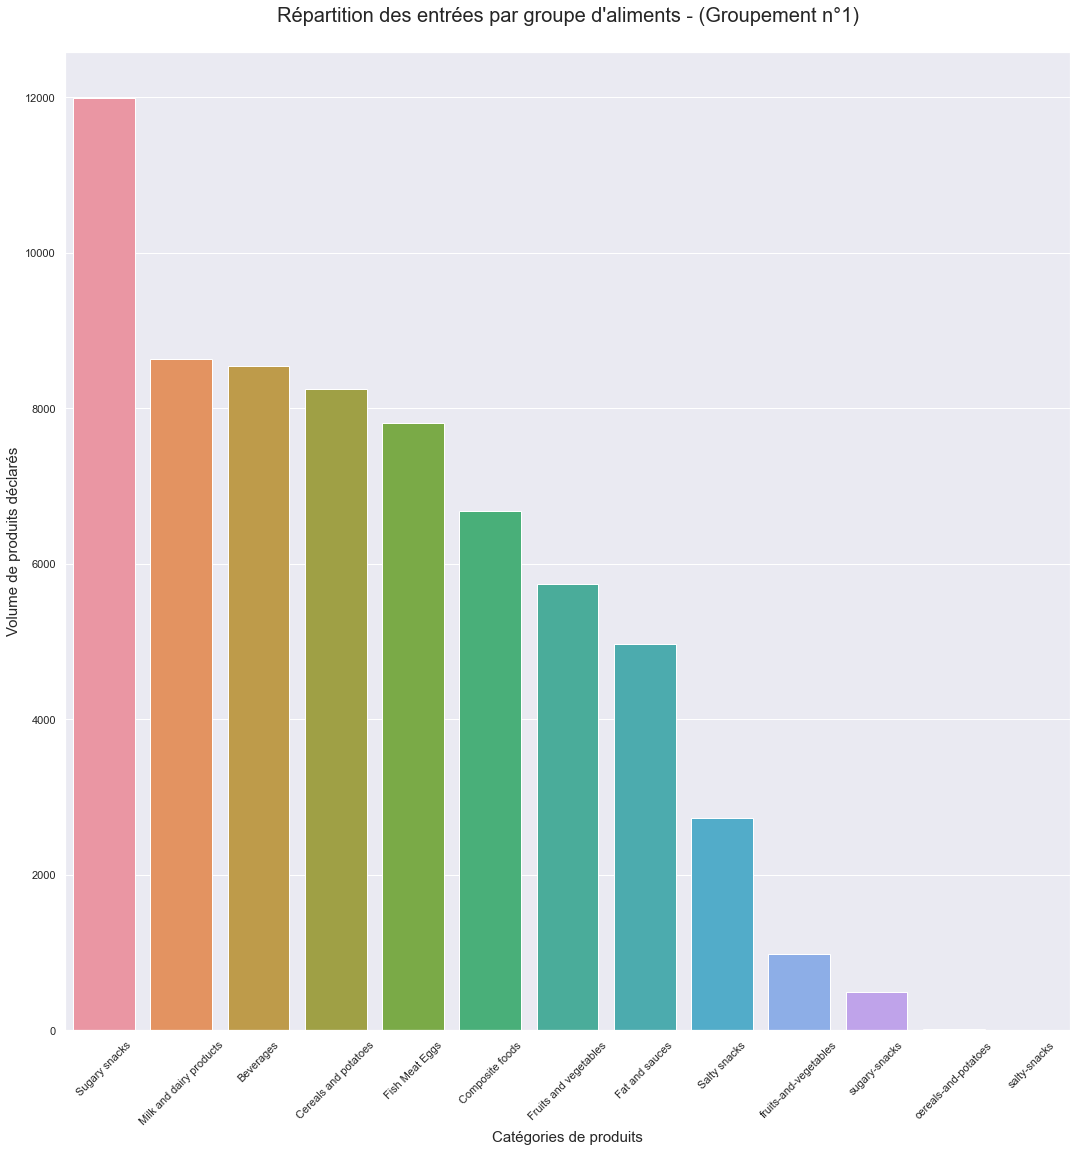

In [98]:
plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

histogramme(df_net, "pnns_groups_1")
#mvi.big_pie_sans_unk_1col(df_net, 'pnns_groups_1', 'unknown')
plt.title("Répartition des entrées par groupe d'aliments - (Groupement n°1)",
          fontsize=20,
          pad=30)
plt.xlabel("Catégories de produits", fontsize=15)
plt.ylabel("Volume de produits déclarés", fontsize=15)
plt.show()

Les collations sucrées (sugary snacks) représentent la plus grande proportion des produits dont la catégorie est renseignée. 

### 2.1.2. Les groupes de produits (Groupement n°2)

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


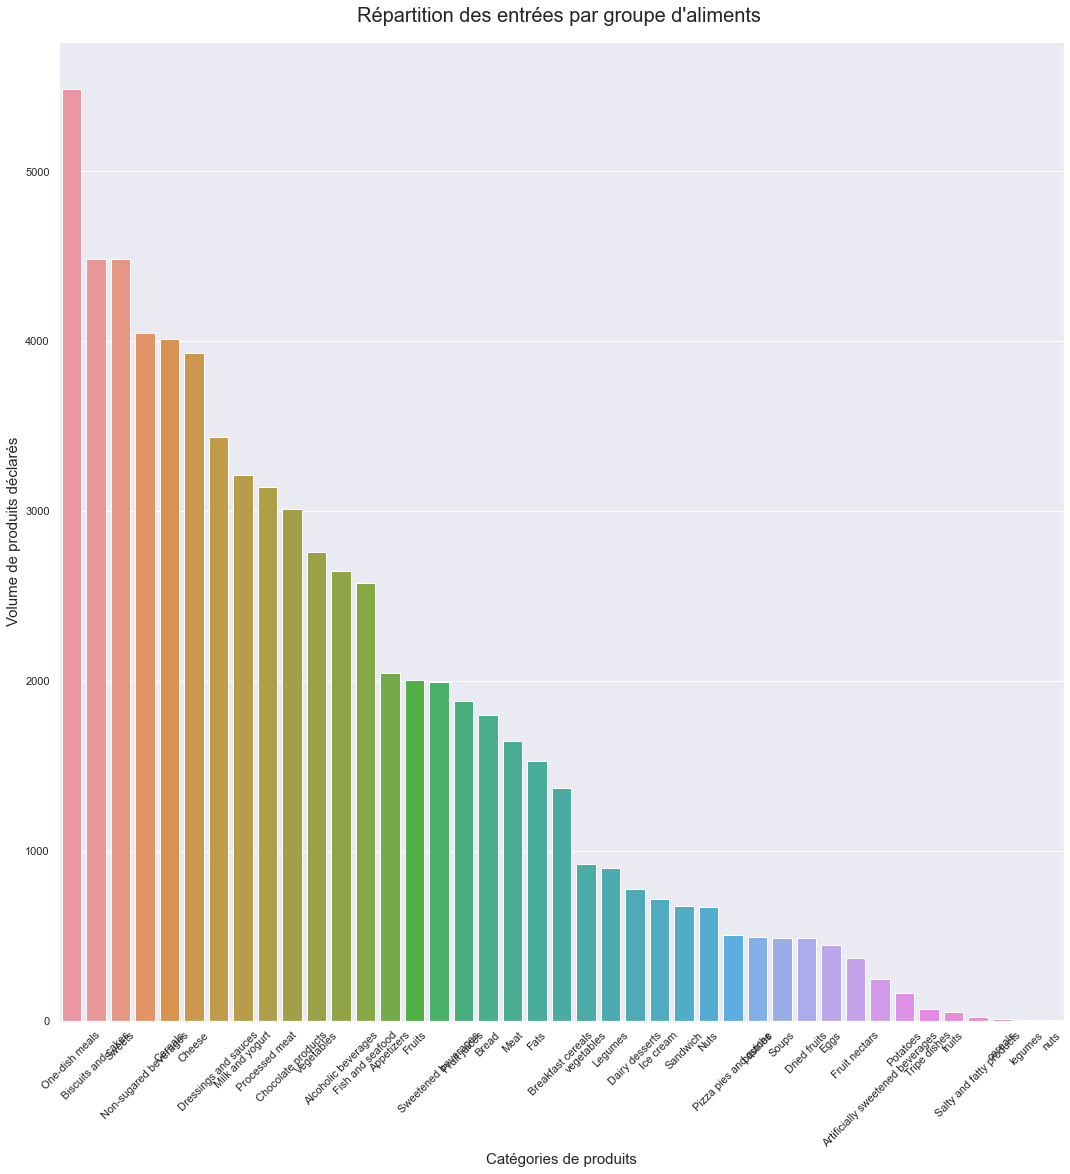

In [99]:

plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

histogramme(df_net, "pnns_groups_2")


plt.title("Répartition des entrées par groupe d'aliments ",
          fontsize=20,
          pad=20)
plt.xlabel("Catégories de produits", fontsize=15)
plt.ylabel("Volume de produits déclarés", fontsize=15)
plt.show()

### 2.1.3. Les marques

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


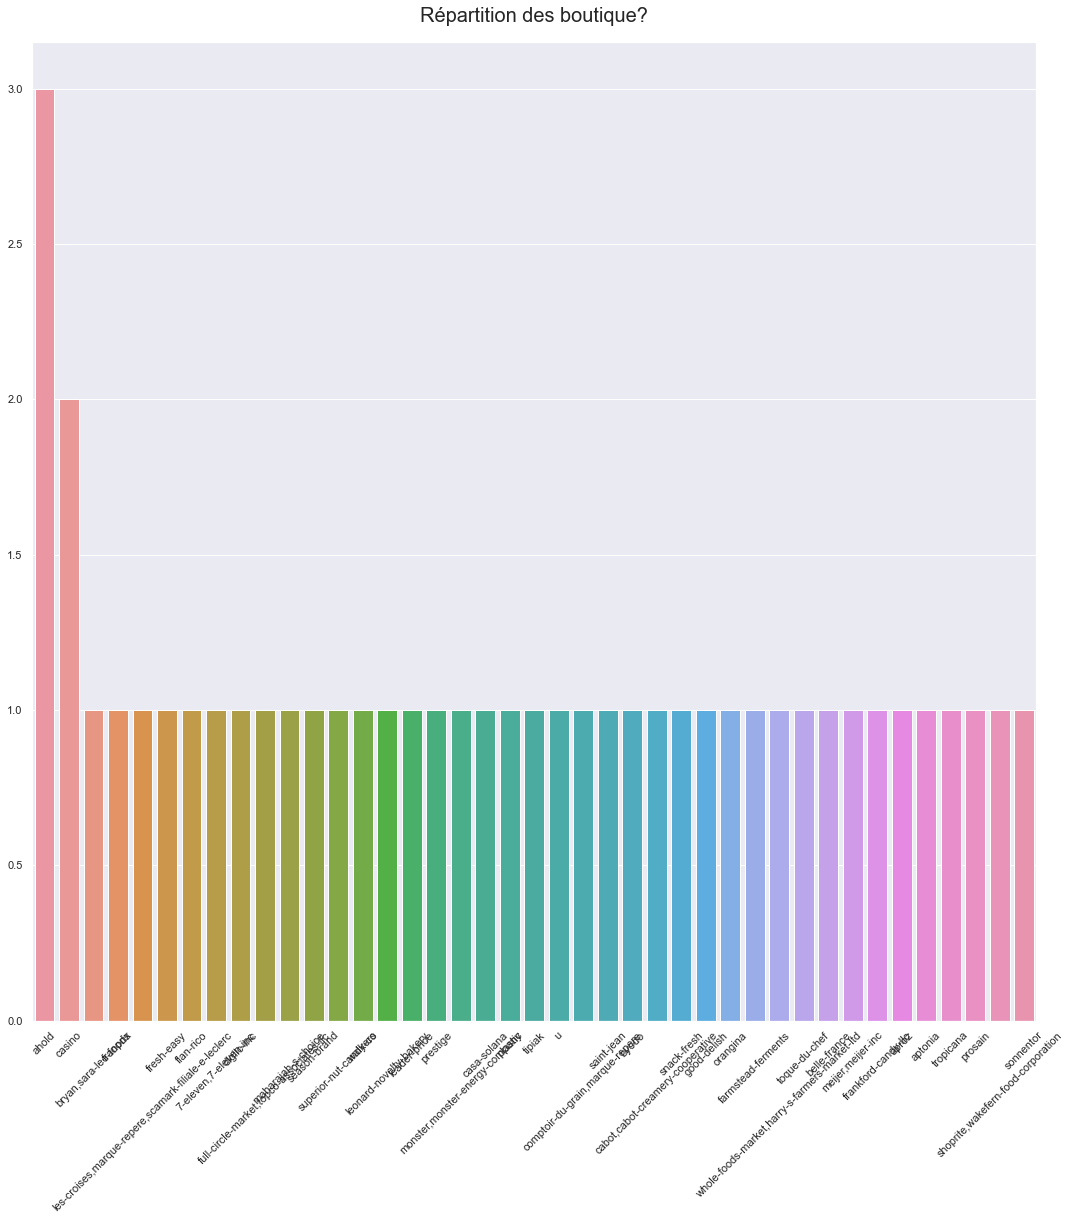

In [100]:

plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

histogramme(df_net.sample(50), "brands_tags")


plt.title("Répartition des boutique?",
          fontsize=20,
          pad=20)
plt.ylabel("", fontsize=15)
plt.show()

Les marques les plus représentées dans la base de données sont celles des grandes enseignes ??

### 2.1.4. Les pays

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


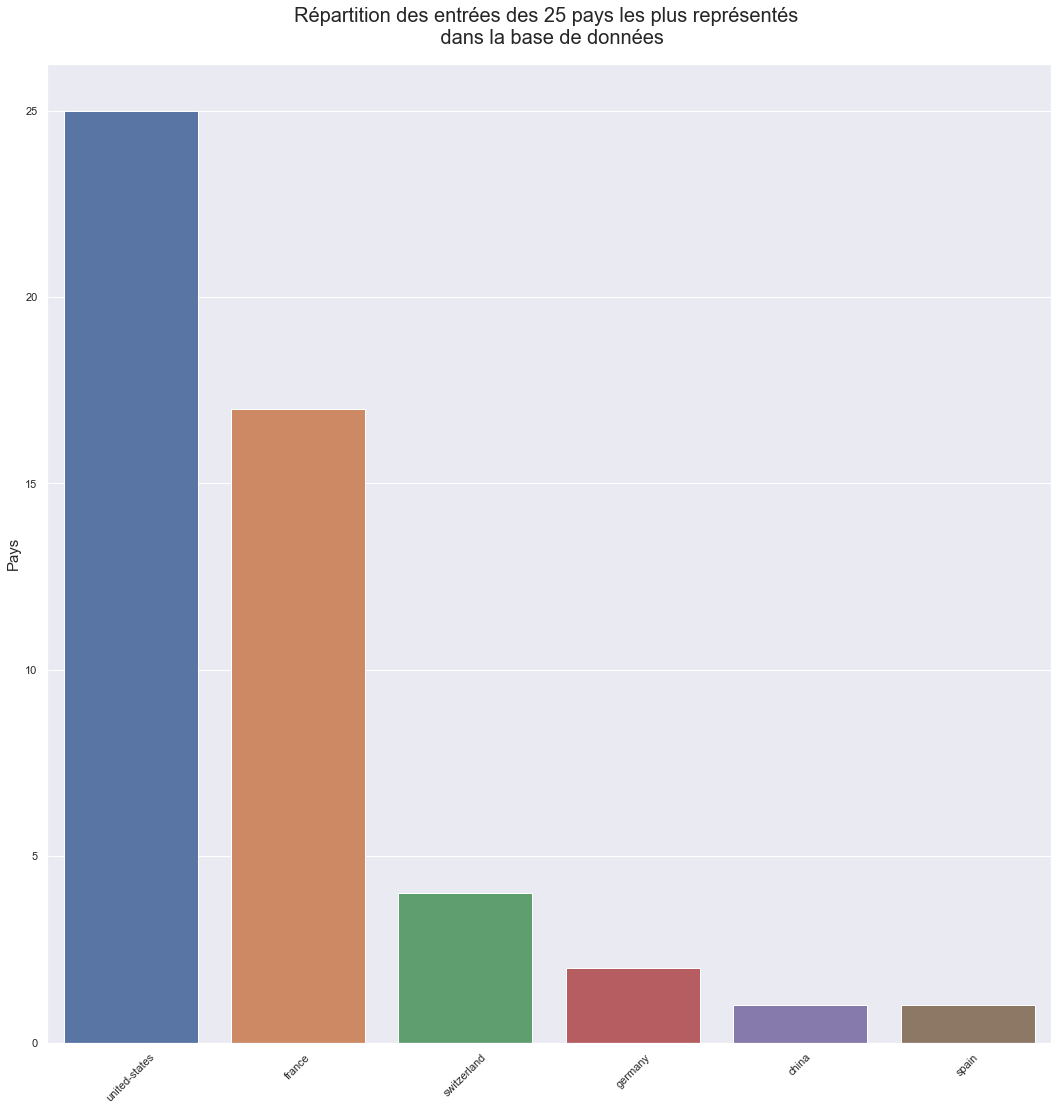

In [101]:



plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

histogramme(df_net.sample(50), "countries")
plt.title(
    "Répartition des entrées des 25 pays les plus représentés \n dans la base de données",
    fontsize=20,
    pad=20)
plt.ylabel("Pays", fontsize=15)
plt.show()

La France est le pays qui contribue au remplissage de la base de données. Viennent ensuite les Etats-Unis et l'Espagne. Les pays de l'Union Européenne contribuent fortement à l'intégration de produits dans la base de données.

# ADDITIFS INGREDIENTS ETC

### 2.1.11. Le nutriscore

In [102]:
df_net

product_name  \
0                                  Allumettes de Bacon   
1                                        Sorbet Citron   
2                                         Roast Sesame   
3                                          Petit frais   
4       Juicy: pear, orange, banana, spinach, celeriac   
...                                                ...   
289867               Chaudfontaine Source Thermal Bron   
289868                                 Butter Biscuits   
289869               Tajihha Galina, Roasted Buckwheat   
289870                                 Sparkling Water   
289871                                   Turkey Franks   

                              brands                brands_tags  \
0                      Fleury Michon              fleury-michon   
1                         Carte D'or                 carte-d-or   
2                               Goma                       goma   
3                             Danone                     danone   
4                            unknown                    unknown   
...                              ...                        ...   
289867                 Chaudfontaine              chaudfontaine   
289868                   Ker Cadelac                ker-cadelac   
289869  Kradjian Importing Co.  Inc.  kradjian-importing-co-inc   
289870    Western Family Foods  Inc.   western-family-foods-inc   
289871                       Aaron's                    aaron-s   

                 categories  \
0       Allumettes de bacon   
1                   unknown   
2                   unknown   
3                   unknown   
4           Jus multifruits   
...                     ...   
289867              unknown   
289868              unknown   
289869              unknown   
289870              unknown   
289871              unknown   

                                          categories_tags  \
0       en:meats,en:pork,en:bacon,en:smoked-bacon-lardons   
1                                                 unknown   
2                                                 unknown   
3                                                 unknown   
4       en:plant-based-foods-and-beverages,en:beverage...   
...                                                   ...   
289867                                            unknown   
289868                                            unknown   
289869                                            unknown   
289870                                            unknown   
289871                                            unknown   

                                            categories_fr      countries  \
0                  Viandes,Porc,Bacon,Allumettes de bacon         france   
1                                                 unknown         france   
2                                                 unknown  united-states   
3                                                 unknown         france   
4       Aliments et boissons à base de végétaux,Boisso...    switzerland   
...                                                   ...            ...   
289867                                            unknown        belgium   
289868                                            unknown  united-states   
289869                                            unknown  united-states   
289870                                            unknown  united-states   
289871                                            unknown  united-states   

       countries_fr  additives_n  \
0            France     3.000000   
1            France     1.938866   
2        États-Unis     0.000000   
3            France     1.938866   
4            Suisse     1.938866   
...             ...          ...   
289867     Belgique     1.938866   
289868   États-Unis     6.000000   
289869   États-Unis     0.000000   
289870   États-Unis     5.000000   
289871   États-Unis     4.000000   

                                                additives  ... sugars_100g  \
0        [

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


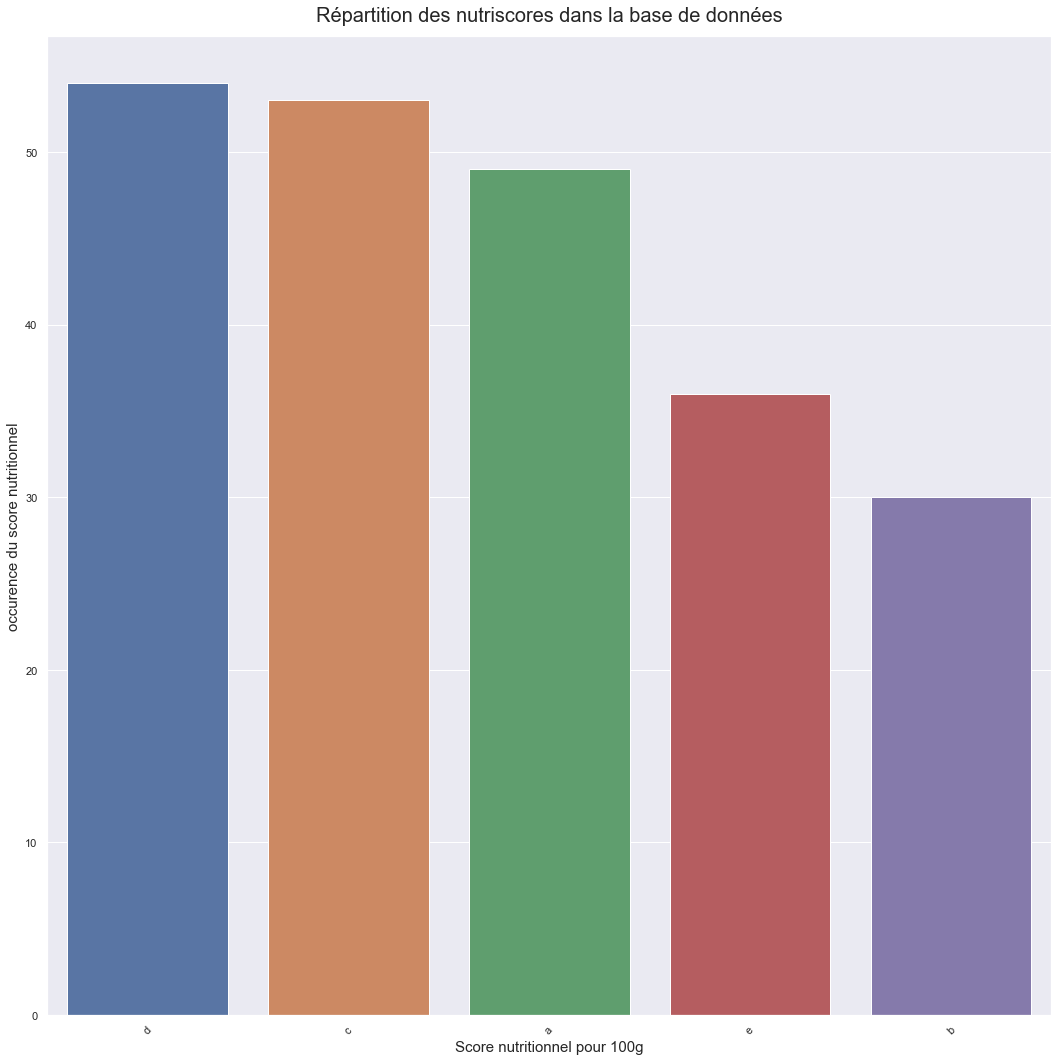

In [103]:



plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

histogramme(df_net.sample(312), "nutrition_grade_fr")
plt.title("Répartition des nutriscores dans la base de données",
          fontsize=20,
          pad=15)
plt.xlabel("Score nutritionnel pour 100g", fontsize=15)
plt.ylabel("occurence du score nutritionnel", fontsize=15)
plt.show()

## 2.2. Les variables quantitatives

### 2.2.2. Le nutriscore

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


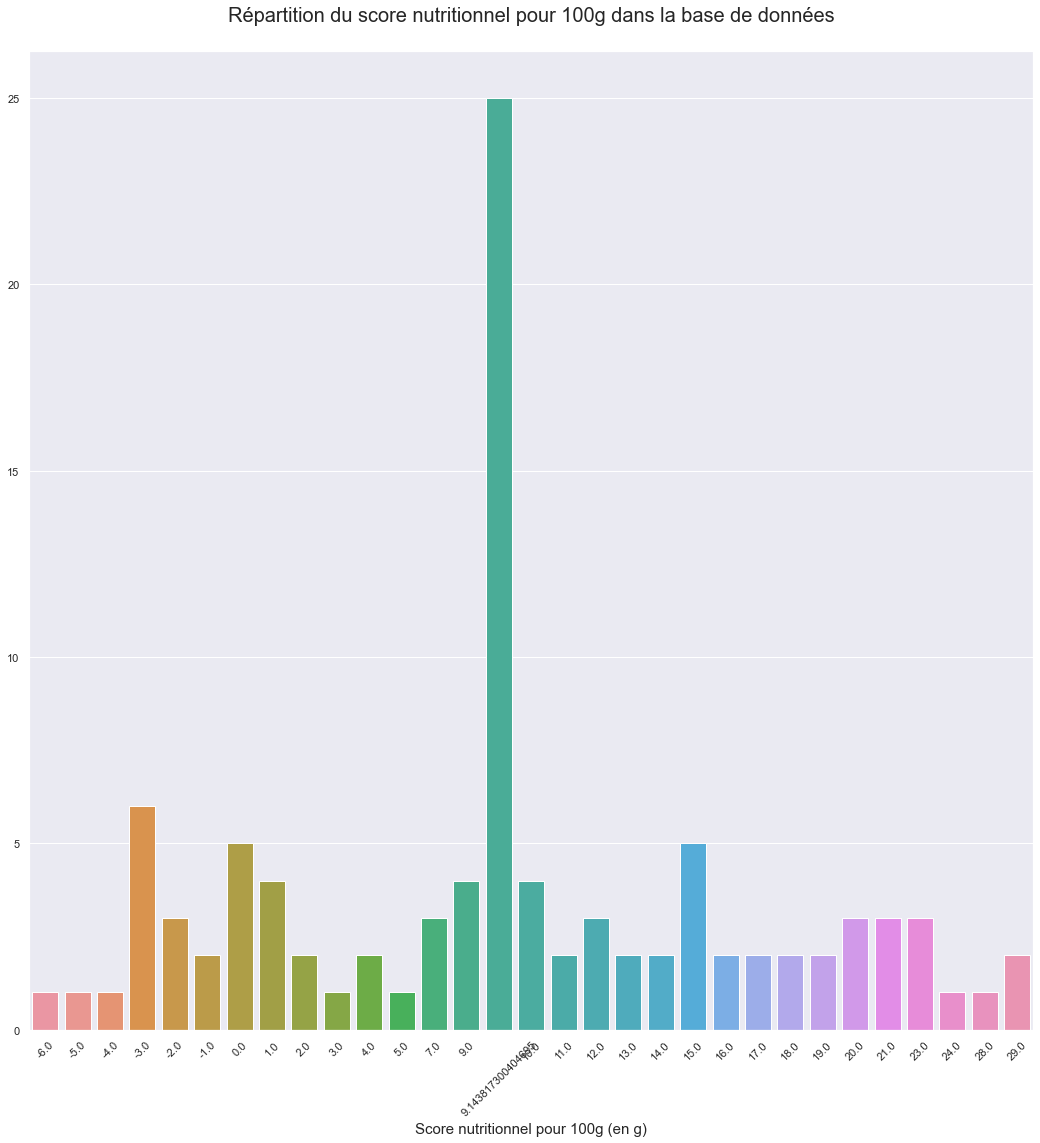

In [104]:

plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

histogramme(df_net.sample(100), "nutrition-score-fr_100g")

plt.title(
    "Répartition du score nutritionnel pour 100g dans la base de données",
    fontsize=20,
    pad=30)
plt.xlabel("Score nutritionnel pour 100g (en g)", fontsize=15)
plt.show()

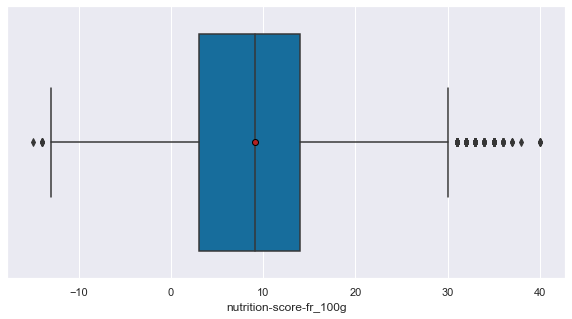

In [105]:
plt.rcParams["figure.figsize"] = (10, 5)
meanprops = {
    'marker': 'o',
    'markeredgecolor': 'black',
    'markerfacecolor': 'firebrick'
}
ax = sns.boxplot(x=df_net['nutrition-score-fr_100g'],
                 palette="colorblind",
                 showmeans=True,
                 meanprops=meanprops)
plt.show()

Le nutriscore visualisé avec sa valeur numérique est bien moins parlant que quand il est visualisé avec sa lettre (son score). Il est néanmoins possible de remarquer que la médiane se situe à une valeur de 10 qui correspond au passage de la lettre C à D. Ceci confirme ce qui a été visualisé avec la variable "nutriscore_grade".

### 2.2.3. L'énergie pour 100g

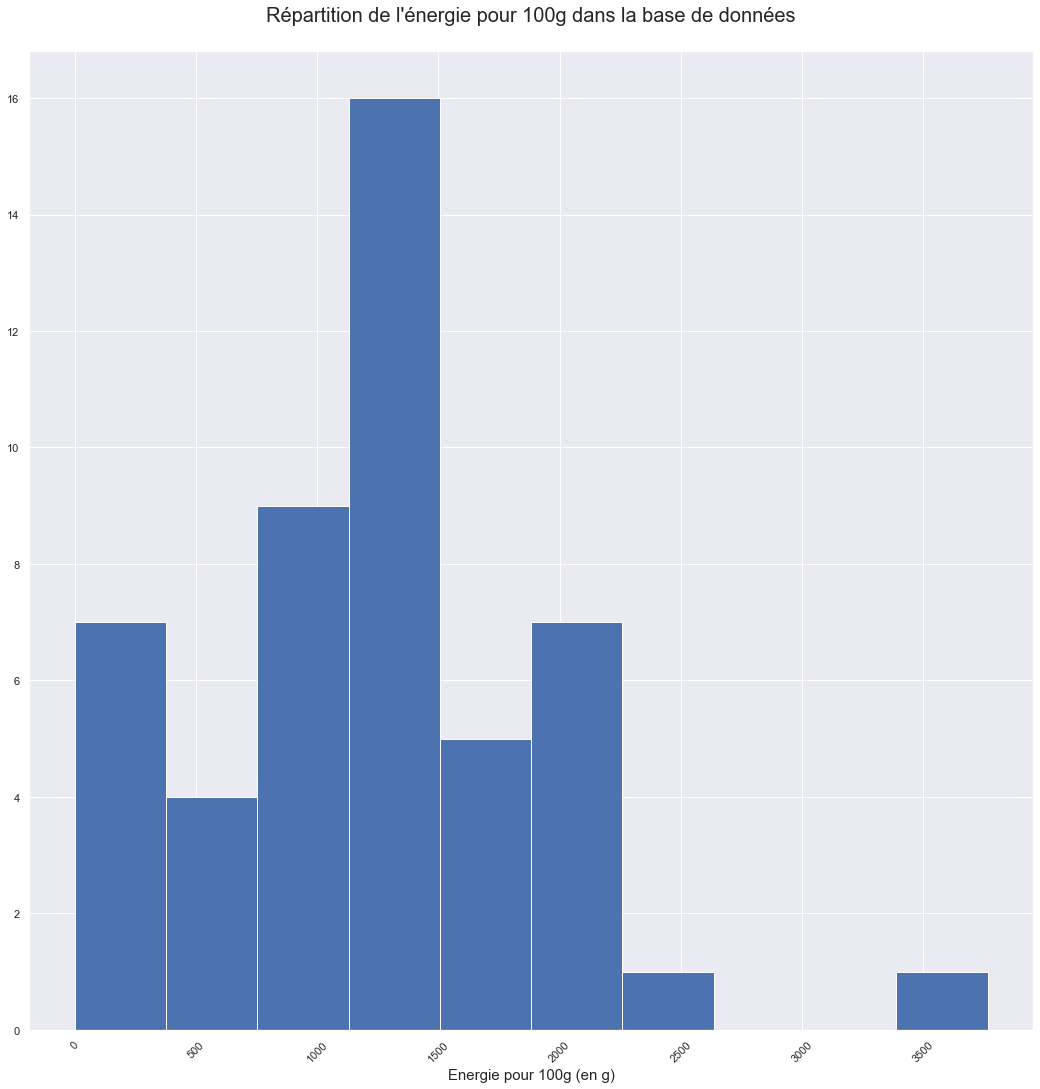

In [106]:
plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

bar(df_net.sample(50), "energy_100g")
plt.title("Répartition de l'énergie pour 100g dans la base de données",
          fontsize=20,
          pad=30)
plt.xlabel("Energie pour 100g (en g)", fontsize=15)
plt.show()

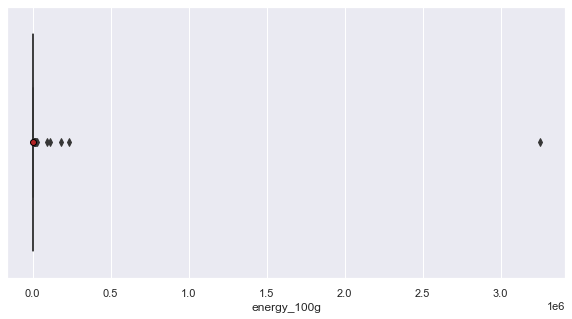

In [107]:
plt.rcParams["figure.figsize"] = (10, 5)
meanprops = {
    'marker': 'o',
    'markeredgecolor': 'black',
    'markerfacecolor': 'firebrick'
}
ax = sns.boxplot(x=df_net['energy_100g'],
                 palette="colorblind",
                 showmeans=True,
                 meanprops=meanprops)
plt.show()

### 2.2.4. Les valeurs nutritionnelles : fat, sugars, fiber, proteins, salt

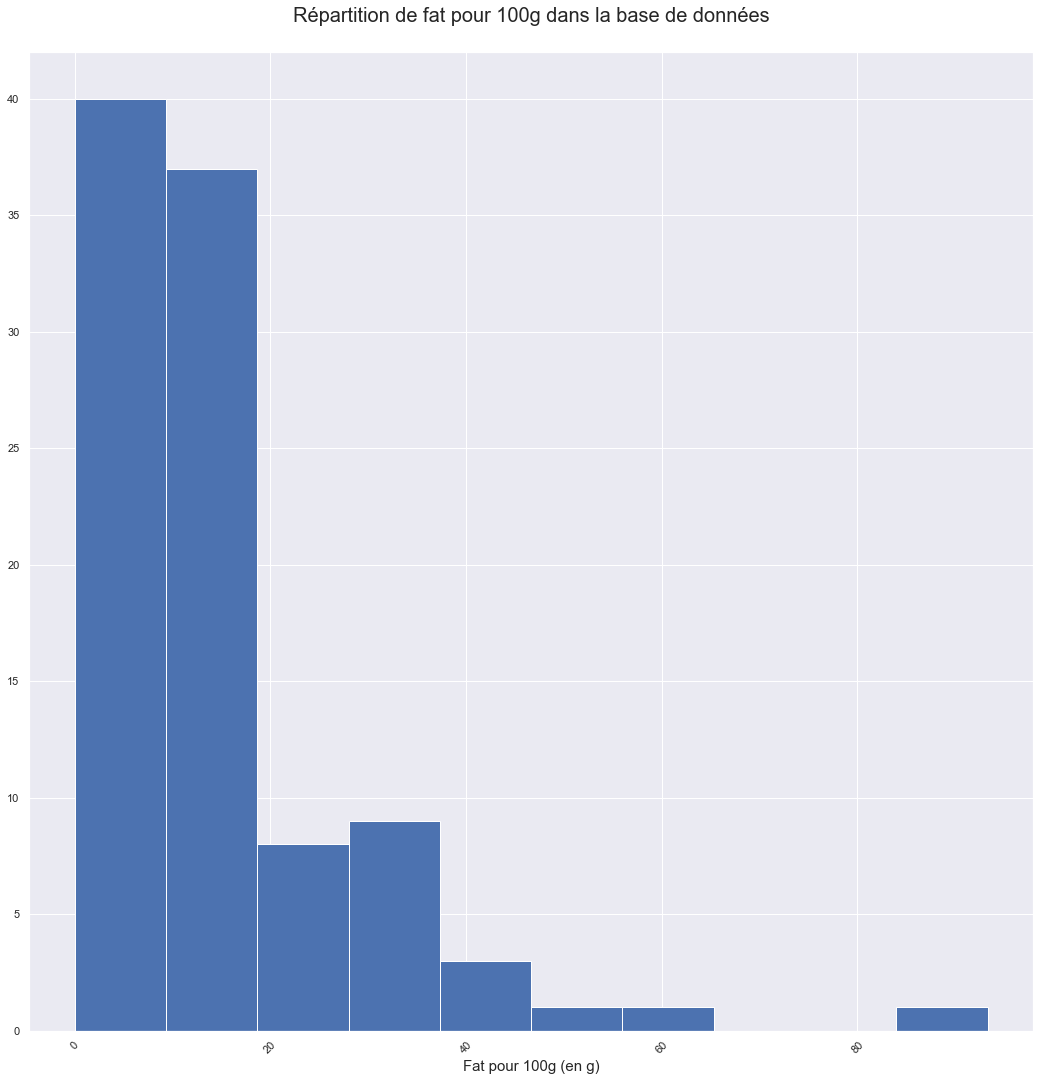

In [108]:
plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

bar(df_net.sample(100), "fat_100g")
plt.title("Répartition de fat pour 100g dans la base de données",
          fontsize=20,
          pad=30)
plt.xlabel("Fat pour 100g (en g)", fontsize=15)
plt.show()

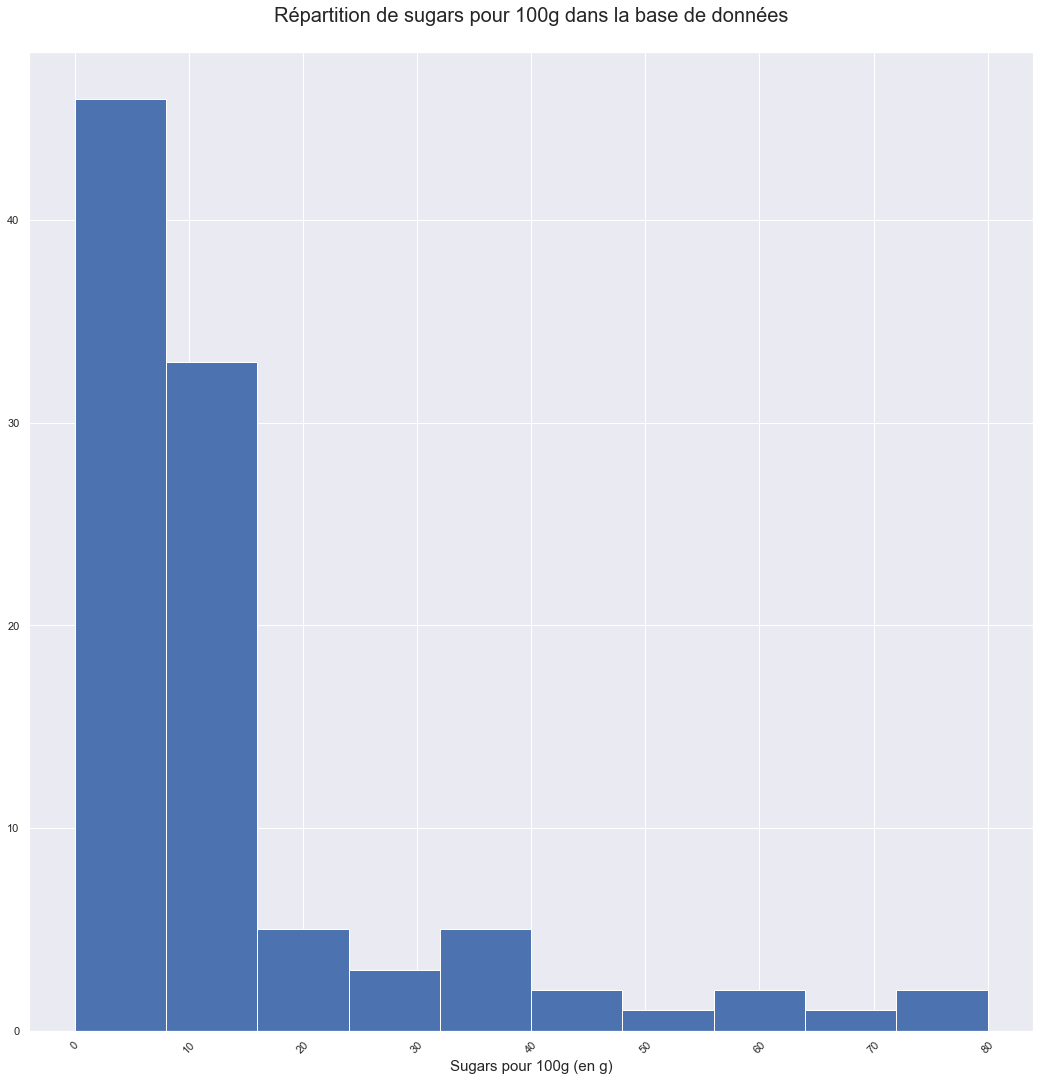

In [109]:
plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

bar(df_net.sample(100), "sugars_100g")

plt.title("Répartition de sugars pour 100g dans la base de données",
          fontsize=20,
          pad=30)
plt.xlabel("Sugars pour 100g (en g)", fontsize=15)
plt.show()

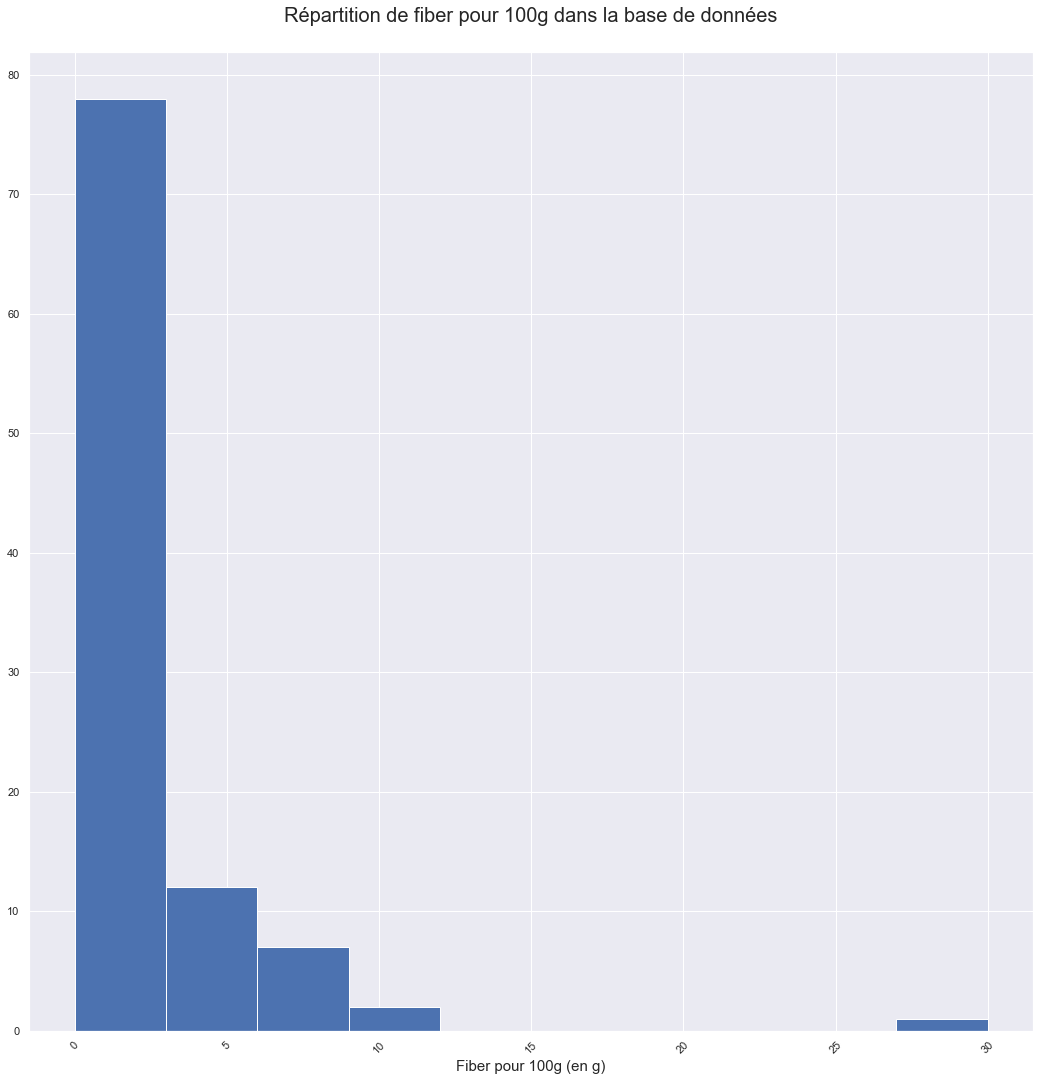

In [110]:
plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

bar(df_net.sample(100), "fiber_100g")
plt.title("Répartition de fiber pour 100g dans la base de données",
          fontsize=20,
          pad=30)
plt.xlabel("Fiber pour 100g (en g)", fontsize=15)
plt.show()

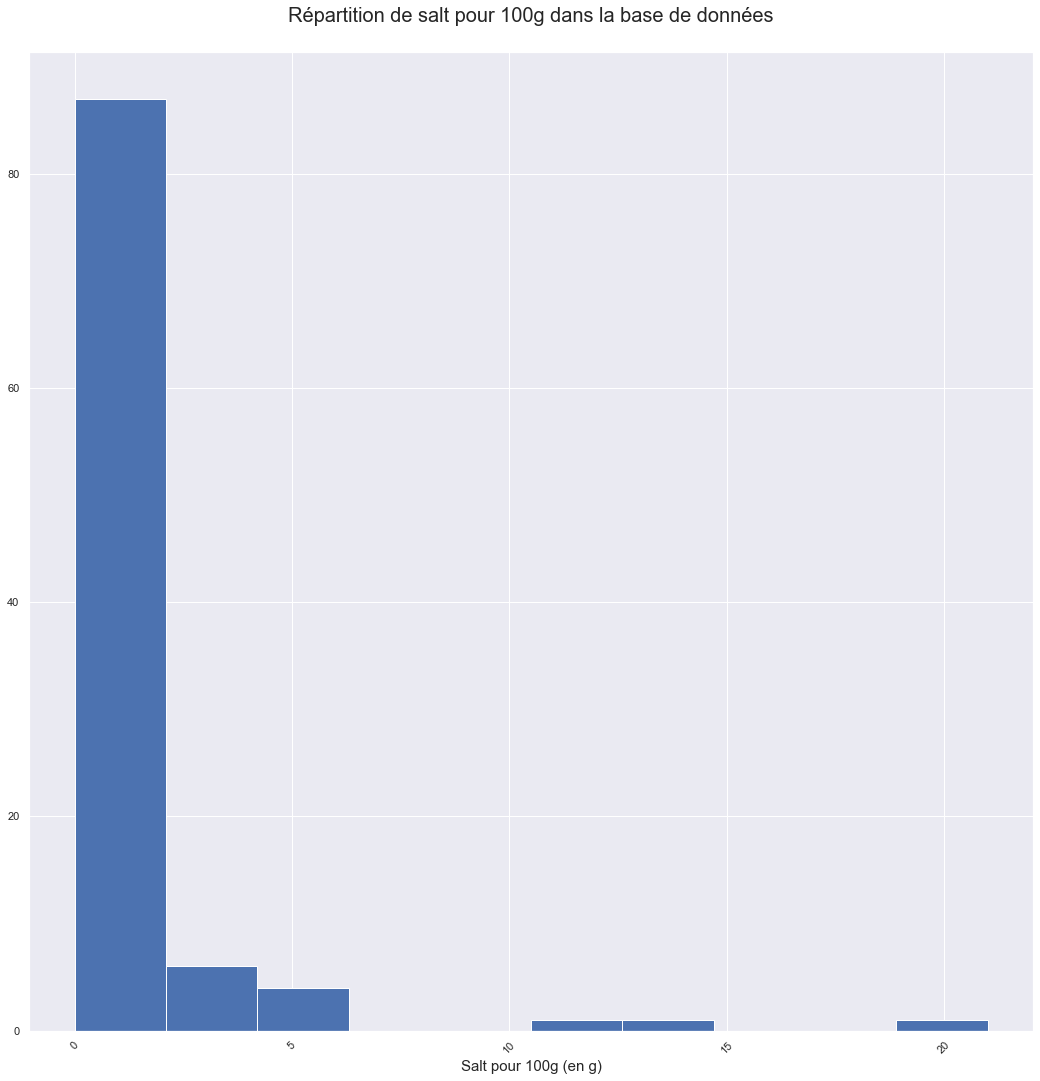

In [111]:

plt.figure(figsize=(18, 18))
plt.xticks(rotation=45)

bar(df_net.sample(100), "salt_100g")
plt.title("Répartition de salt pour 100g dans la base de données",
          fontsize=20,
          pad=30)
plt.xlabel("Salt pour 100g (en g)", fontsize=15)
plt.show()

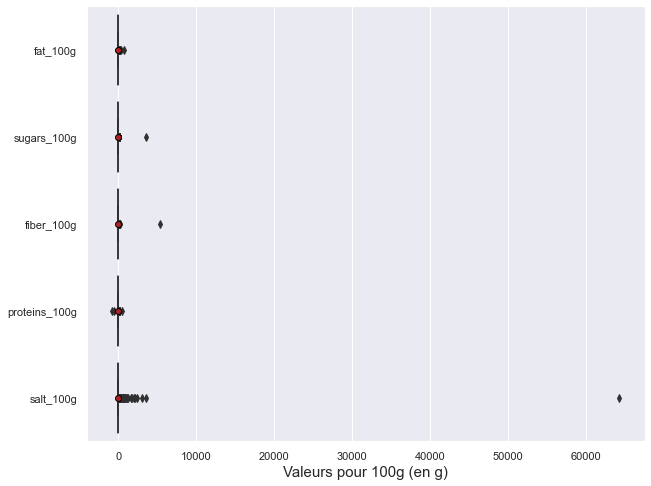

In [112]:
columns_quanti = [
    'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'
]
df_quanti = df_net[columns_quanti]
plt.rcParams["figure.figsize"] = (10, 8)
meanprops = {
    'marker': 'o',
    'markeredgecolor': 'black',
    'markerfacecolor': 'firebrick'
}
ax = sns.boxplot(data=df_quanti,
                 orient="h",
                 palette="colorblind",
                 showmeans=True,
                 meanprops=meanprops)
plt.xlabel("Valeurs pour 100g (en g)", fontsize=15)
plt.show()

# 3. Analyse multivariée

## 3.1. Visualisations

In [113]:
%matplotlib inline

## 3.2. Analyse de deux variables quantitatives

<AxesSubplot:title={'center':'Correlation of Numeric Features with y'}>

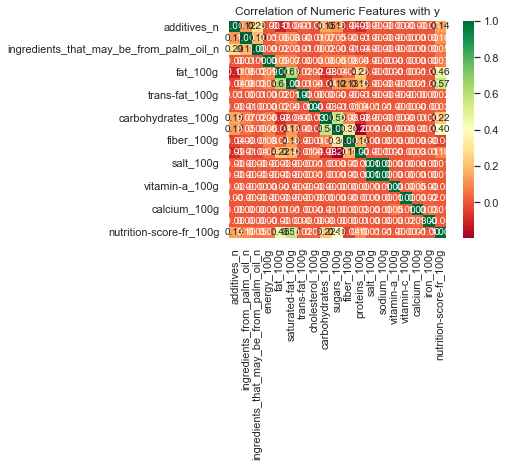

In [114]:
#df_net.corr()
#Heatmap of correlations
from matplotlib import rcParams
plt.title('Correlation of Numeric Features with y')

rcParams['figure.figsize'] = (25, 25)
sns.heatmap(df_net.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')

## PCA : Analyse en composantes principales

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.decomposition import PCA

#Centrage et réduction
X = df_net.select_dtypes(include=['float64','int64'])
X_scaled = scaler.fit_transform(X)

#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X_scaled) # où sont calculés PCA1 et PCA2? pas besoin du Scree Plot ?
X_projected = pca.transform(X_scaled)

In [116]:
#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3]})
corr_matrix

feature   CORR_F1   CORR_F2   CORR_F3  \
0                               additives_n  0.101358  0.005530  0.443729   
1               ingredients_from_palm_oil_n  0.197484 -0.000777  0.155783   
2   ingredients_that_may_be_from_palm_oil_n  0.104864 -0.000845  0.201881   
3                               energy_100g  0.188369 -0.002149  0.004830   
4                                  fat_100g  0.695334 -0.015710 -0.488201   
5                        saturated-fat_100g  0.797826 -0.010843 -0.344336   
6                            trans-fat_100g  0.028724 -0.000384  0.002786   
7                          cholesterol_100g  0.048846  0.028127 -0.091587   
8                        carbohydrates_100g  0.308257  0.009397  0.703673   
9                               sugars_100g  0.477204  0.011321  0.700950   
10                               fiber_100g  0.232675 -0.000691  0.125343   
11                            proteins_100g  0.220140 -0.011843 -0.468284   
12                                salt_100g  0.003128  0.999748 -0.015713   
13                              sodium_100g  0.003128  0.999748 -0.015713   
14                           vitamin-a_100g  0.001031 -0.000050 -0.007456   
15                           vitamin-c_100g -0.002989  0.000596  0.009184   
16                             calcium_100g  0.019800 -0.000247 -0.033547   
17                                iron_100g -0.000443  0.000285  0.000645   
18                  nutrition-score-fr_100g  0.828014  0.007873  0.053223   

     CORR_F4  
0  -0.547753  
1  -0.465016  
2  -0.672033  
3   0.132373  
4  -0.073463  
5  -0.041535  
6  -0.031490  
7  -0.022071  
8   0.231213  
9   0.331635  
10  0.451025  
11  0.103317  
12 -0.001133  
13 -0.001133  
14  0.000788  
15  0.002704  
16 -0.002294  
17  0.005609  
18 -0.094278

In [117]:
#varexpl.cumsum()

In [118]:
X.shape

(289872, 19)

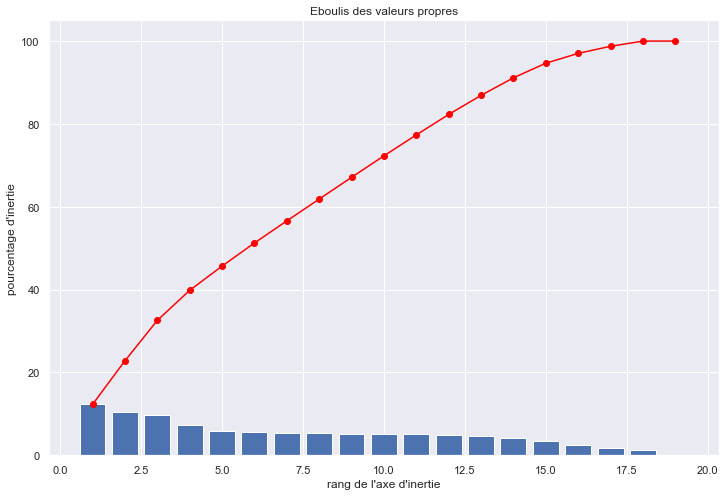

In [119]:
#Variances expliquées
varexpl = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [120]:
#pip install mlxtend
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler

# Using the pca above computed (PC1, PC2)

fig, correlation_matrix = plot_pca_correlation_graph(
    X_scaled[0:4000], 
    X.columns,
    dimensions=(1, 2),
    figure_axis_size=6
)
correlation_matrix

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
# Using the pca above computed (PC3, PC4)
fig, correlation_matrix = plot_pca_correlation_graph(
    #X_scaled, 
    X_scaled[0:4000], 
    X.columns,
    dimensions=(3, 4),
    #dimensions=(40, 11),
    figure_axis_size=6
)
correlation_matrix

## KMEANS et CLUSTERISATION

In [ ]:
#sns.pairplot(df_net.sample(100).dropna(), hue="nutrition_grade_fr")

In [ ]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_projected)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

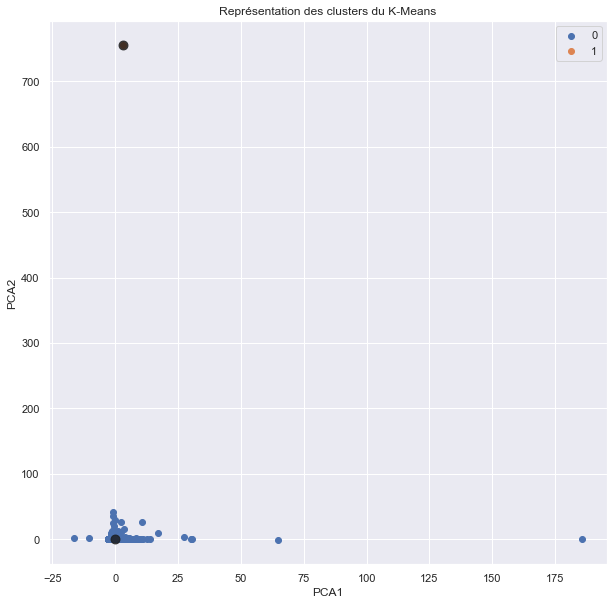

In [121]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2) # pourquoi 6 et pas 5? et quel est la dimenssion des axes?

#Prédiction
label = km.fit_predict(X_projected)
 
centroids = km.cluster_centers_
u_labels = np.unique(label)
#df['classe']=u_labels
#après on fait un group_by()

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(X_projected[label == i , 0] , X_projected[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("representation_kmeans.png")
plt.show()

## PREDICTION NUTRITIONNELLE

In [122]:
df_net.nutrition_grade_fr.value_counts()

unknown    80085
d          59480
c          43317
e          40653
a          33924
b          32413
Name: nutrition_grade_fr, dtype: int64

In [123]:
df_net

product_name  \
0                                  Allumettes de Bacon   
1                                        Sorbet Citron   
2                                         Roast Sesame   
3                                          Petit frais   
4       Juicy: pear, orange, banana, spinach, celeriac   
...                                                ...   
289867               Chaudfontaine Source Thermal Bron   
289868                                 Butter Biscuits   
289869               Tajihha Galina, Roasted Buckwheat   
289870                                 Sparkling Water   
289871                                   Turkey Franks   

                              brands                brands_tags  \
0                      Fleury Michon              fleury-michon   
1                         Carte D'or                 carte-d-or   
2                               Goma                       goma   
3                             Danone                     danone   
4                            unknown                    unknown   
...                              ...                        ...   
289867                 Chaudfontaine              chaudfontaine   
289868                   Ker Cadelac                ker-cadelac   
289869  Kradjian Importing Co.  Inc.  kradjian-importing-co-inc   
289870    Western Family Foods  Inc.   western-family-foods-inc   
289871                       Aaron's                    aaron-s   

                 categories  \
0       Allumettes de bacon   
1                   unknown   
2                   unknown   
3                   unknown   
4           Jus multifruits   
...                     ...   
289867              unknown   
289868              unknown   
289869              unknown   
289870              unknown   
289871              unknown   

                                          categories_tags  \
0       en:meats,en:pork,en:bacon,en:smoked-bacon-lardons   
1                                                 unknown   
2                                                 unknown   
3                                                 unknown   
4       en:plant-based-foods-and-beverages,en:beverage...   
...                                                   ...   
289867                                            unknown   
289868                                            unknown   
289869                                            unknown   
289870                                            unknown   
289871                                            unknown   

                                            categories_fr      countries  \
0                  Viandes,Porc,Bacon,Allumettes de bacon         france   
1                                                 unknown         france   
2                                                 unknown  united-states   
3                                                 unknown         france   
4       Aliments et boissons à base de végétaux,Boisso...    switzerland   
...                                                   ...            ...   
289867                                            unknown        belgium   
289868                                            unknown  united-states   
289869                                            unknown  united-states   
289870                                            unknown  united-states   
289871                                            unknown  united-states   

       countries_fr  additives_n  \
0            France     3.000000   
1            France     1.938866   
2        États-Unis     0.000000   
3            France     1.938866   
4            Suisse     1.938866   
...             ...          ...   
289867     Belgique     1.938866   
289868   États-Unis     6.000000   
289869   États-Unis     0.000000   
289870   États-Unis     5.000000   
289871   États-Unis     4.000000   

                                                additives  ... sugars_100g  \
0        [

In [124]:
ydf_0=df_net.copy()
#par exemple je veux predire dans mon dataset df, la valeur du nutriscore
ydf_0=ydf_0.dropna()
ydf_1=ydf_0.sample(311)
X= ydf_1.drop(['nutrition_grade_fr'],axis=1)  #mes variables
y = ydf_1['nutrition_grade_fr']  # ma cible de prédiction



In [125]:
#Il faut mettre toutes les variables aux memes echelles
from sklearn.preprocessing import StandardScaler
numerical_cols=X.select_dtypes(exclude='object').columns.tolist()
scaler=StandardScaler()
X[numerical_cols]=scaler.fit_transform(X[numerical_cols])
X[numerical_cols]=pd.DataFrame(X,columns=numerical_cols)


#Transformation des variables qualitatives en quantitatives
categorical_cols=X.select_dtypes(include='object').columns.tolist()
X_sc_enc = pd.get_dummies(X, columns=categorical_cols)


In [126]:
X_sc_enc.head()

additives_n  ingredients_from_palm_oil_n  \
210636    -0.861275                    -0.128226   
33220     -0.861275                    -0.128226   
79071     -0.006075                     0.115692   
125236     0.461972                    -0.128226   
55068      0.020890                    -0.128226   

        ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
210636                                -0.217304     1.148900  0.480147   
33220                                 -0.217304    -0.778952 -0.532076   
79071                                  0.012631    -1.546498 -0.012637   
125236                                -0.217304     1.507088  1.284563   
55068                                 -0.217304     0.356461  1.373719   

        saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
210636           -0.639514       -0.225060         -0.315559   
33220            -0.426763        0.078125         -0.315559   
79071            -0.639514        0.078125         -0.315559   
125236           -0.244405        0.078125         -0.315559   
55068             0.374093       -0.225060          1.521415   

        carbohydrates_100g  sugars_100g  ...  main_category_fr_Sodas light  \
210636            1.350080    -0.871858  ...                             0   
33220            -1.306560    -0.871858  ...                             0   
79071            -0.085393    -0.848102  ...                             0   
125236            0.704896    -0.810093  ...                             0   
55068            -1.053420    -0.871858  ...                             0   

        main_category_fr_Sucres  main_category_fr_Terrines  \
210636                        0                          0   
33220                         0                          0   
79071                         0                          0   
125236                        0                          0   
55068                         0                          0   

        main_category_fr_Tomates  main_category_fr_Viandes  \
210636                         0                         0   
33220                          0                         0   
79071                          0                         0   
125236                         0                         0   
55068                          0                         0   

        main_category_fr_Volailles  main_category_fr_Yaourts  \
210636                           0                         0   
33220                            0                         0   
79071                            0                         0   
125236                           0                         0   
55068                            0                         0   

        main_category_fr_Yaourts brassés  main_category_fr_en:Levures  \
210636                                 0                            0   
33220                                  0                            0   
79071                                  0                            0   
125236                                 0                            0   
55068                                  0                            0   

        main_category_fr_unknown  
210636                         1  
33220                          0  
79071                          1  
125236                         0  
55068                          1  

[5 rows x 1771 columns]

In [127]:
### PREDICTION WITH SKLEARN
import sklearn # blibliothèque la plus célèbre pour faire du machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression

#from sklearn.neural_network import MLPRegressor

# Split the data set in a training set (90%) and a test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X_sc_enc, y, test_size=0.10, random_state=100)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))
# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))

#model prediction
# Run the model and make a prediction  and look at the first prediction returned
prediction=model.predict(X_test)
#checking the performance of the model
y_verif= pd.DataFrame({'Score Expected':y_test, 'Score Predicted':prediction})
print(y_verif.head(10))

Train set score: 1.000
Test set score: 0.719
       Score Expected Score Predicted
174441              d               c
86715         unknown         unknown
267973        unknown               d
60644               a               b
125444              b               b
249944        unknown         unknown
108929              d         unknown
241164              b               b
101952        unknown         unknown
99671         unknown         unknown


C:\Users\tarik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SYSTEME DE RECOMMENDATION

In [128]:
from sklearn.neighbors import KDTree

In [129]:
numerical_cols=df_net.select_dtypes(exclude='object').columns.tolist()
# pour récupérer nutrition_grade_fr
#numerical_cols=df_net.columns.tolist()
dfknn=df_net[numerical_cols].dropna()
dfknn.head()

additives_n  ingredients_from_palm_oil_n  \
0     3.000000                     0.000000   
1     1.938866                     0.019514   
2     0.000000                     0.000000   
3     1.938866                     0.019514   
4     1.938866                     0.019514   

   ingredients_that_may_be_from_palm_oil_n  energy_100g   fat_100g  \
0                                 0.000000   459.000000   2.300000   
1                                 0.055814   586.000000  12.648819   
2                                 0.000000  2268.000000  41.670000   
3                                 0.055814  1141.690593  12.648819   
4                                 0.055814   300.000000   0.500000   

   saturated-fat_100g  trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
0                0.80        0.073951               0.0            0.500000   
1                0.30        0.073951               0.0           32.176635   
2                0.00        0.000000               0.0           33.330000   
3                1.79        0.073951               0.0           32.176635   
4                0.00        0.073951               0.0           15.000000   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0     0.500000    2.872184      22.000000      2.700     1.062992   
1    27.000000    0.000000       0.300000      0.039     0.015354   
2     8.330000   16.700000      16.670000      0.000     0.000000   
3    15.900968    2.872184       7.107037      0.590     0.232283   
4     9.000000    2.500000       1.000000      0.030     0.011811   

   vitamin-a_100g  vitamin-c_100g  calcium_100g  iron_100g  \
0             0.0             0.0      0.125892   0.003372   
1             0.0             0.0      0.125892   0.003372   
2             0.0             0.0      0.000000   0.000000   
3             0.0             0.0      0.125892   0.003372   
4             0.0             0.0      0.125892   0.003372   

   nutrition-score-fr_100g  
0                11.000000  
1                 6.000000  
2                -3.000000  
3                 9.143817  
4                 3.000000

In [130]:
dfknn.shape

(289872, 19)

In [131]:
tree = KDTree(dfknn)


In [132]:
dfknn[9:10]

additives_n  ingredients_from_palm_oil_n  \
9          0.0                          0.0   

   ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
9                                      0.0       2389.0     46.43   

   saturated-fat_100g  trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
9                8.93             0.0               0.0               28.57   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
9         3.57         3.6          17.86    0.40894        0.161   

   vitamin-a_100g  vitamin-c_100g  calcium_100g  iron_100g  \
9             0.0             0.0         0.071    0.00643   

   nutrition-score-fr_100g  
9                     11.0

In [133]:
dist, ind = tree.query(dfknn[9:15], k=6)


In [134]:
dfknn.iloc[ind.tolist()[0]]
#ind.tolist()[0][0:14]

additives_n  ingredients_from_palm_oil_n  \
96082           0.0                          0.0   
9               0.0                          0.0   
236267          0.0                          0.0   
73133           0.0                          0.0   
118018          0.0                          0.0   
254150          0.0                          0.0   

        ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
96082                                       0.0       2389.0     46.43   
9                                           0.0       2389.0     46.43   
236267                                      0.0       2389.0     46.43   
73133                                       0.0       2389.0     46.43   
118018                                      0.0       2389.0     46.43   
254150                                      0.0       2389.0     46.43   

        saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
96082                 8.93             0.0               0.0   
9                     8.93             0.0               0.0   
236267                8.93             0.0               0.0   
73133                 8.93             0.0               0.0   
118018                8.93             0.0               0.0   
254150                8.93             0.0               0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
96082                28.57         3.57         3.6          17.86    0.40894   
9                    28.57         3.57         3.6          17.86    0.40894   
236267               28.57         3.57         3.6          17.86    0.40894   
73133                28.57         3.57         3.6          17.86    0.49784   
118018               28.57         3.57         3.6          17.86    0.49784   
254150               28.57         3.57         3.6          17.86    0.49784   

        sodium_100g  vitamin-a_100g  vitamin-c_100g  calcium_100g  iron_100g  \
96082         0.161             0.0             0.0         0.071    0.00643   
9             0.161             0.0             0.0         0.071    0.00643   
236267        0.161             0.0             0.0         0.071    0.00643   
73133         0.196             0.0             0.0         0.071    0.00643   
118018        0.196             0.0             0.0         0.071    0.00643   
254150        0.196             0.0             0.0         0.071    0.00643   

        nutrition-score-fr_100g  
96082                      11.0  
9                          11.0  
236267                     11.0  
73133                      12.0  
118018                     12.0  
254150                     12.0

In [135]:
dfknn.iloc[ind.tolist()[0]].sort_values("nutrition-score-fr_100g",ascending=False) #le plus nutritif

additives_n  ingredients_from_palm_oil_n  \
73133           0.0                          0.0   
118018          0.0                          0.0   
254150          0.0                          0.0   
96082           0.0                          0.0   
9               0.0                          0.0   
236267          0.0                          0.0   

        ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
73133                                       0.0       2389.0     46.43   
118018                                      0.0       2389.0     46.43   
254150                                      0.0       2389.0     46.43   
96082                                       0.0       2389.0     46.43   
9                                           0.0       2389.0     46.43   
236267                                      0.0       2389.0     46.43   

        saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
73133                 8.93             0.0               0.0   
118018                8.93             0.0               0.0   
254150                8.93             0.0               0.0   
96082                 8.93             0.0               0.0   
9                     8.93             0.0               0.0   
236267                8.93             0.0               0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
73133                28.57         3.57         3.6          17.86    0.49784   
118018               28.57         3.57         3.6          17.86    0.49784   
254150               28.57         3.57         3.6          17.86    0.49784   
96082                28.57         3.57         3.6          17.86    0.40894   
9                    28.57         3.57         3.6          17.86    0.40894   
236267               28.57         3.57         3.6          17.86    0.40894   

        sodium_100g  vitamin-a_100g  vitamin-c_100g  calcium_100g  iron_100g  \
73133         0.196             0.0             0.0         0.071    0.00643   
118018        0.196             0.0             0.0         0.071    0.00643   
254150        0.196             0.0             0.0         0.071    0.00643   
96082         0.161             0.0             0.0         0.071    0.00643   
9             0.161             0.0             0.0         0.071    0.00643   
236267        0.161             0.0             0.0         0.071    0.00643   

        nutrition-score-fr_100g  
73133                      12.0  
118018                     12.0  
254150                     12.0  
96082                      11.0  
9                          11.0  
236267                     11.0

In [137]:
pip install plotly

In [138]:
#pip install plotly
import plotly.graph_objects as go

#X = dfknn.select_dtypes(include=['float64','int64']) # pour normaliser
dfknn = pd.DataFrame(scaler.fit_transform(dfknn),columns=dfknn.columns)

categories = dfknn.columns.tolist()

fig = go.Figure()
for i in ind.tolist()[0][0:6]:
    fig.add_trace(go.Scatterpolar(
          r=dfknn[i:i+1].values.tolist()[0],
          theta=categories,
          fill='toself',
          name='Product'+' n° '+str(i)))
    fig.show()

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show()